### 1) Step-1 Importing the libraries and ignoring the warning

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [208]:
pd.set_option('display.max_columns', 1000) # to display all the columns
pd.set_option('display.max_rows', 1000) # to display all the rows
pd.set_option('display.width', 1000)

###  2) Step-2 Uploading the file in jupyter notebook


In [209]:
Application_df=pd.read_csv("application_data.csv")

### 3)Checking the Application Data 


In [210]:
#Inspecting the first five rows 
Application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### after inspecting the first rows we found that some columns have nulls and some columns have values in -VE Need to treat these.
#List of -Ve columns which we need to convert in +ve later on

1)DAYS_BIRTH

2)DAYS_EMPLOYED

3)DAYS_REGISTRATION

4)DAYS_ID_PUBLISH

In [211]:
#Checking the shape of data 
Application_df.shape

(307511, 122)

In [212]:
#Checking the data type
pd.set_option("display.max_rows",1000)
Application_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [213]:
Application_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [214]:
Application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### 4)Data cleaning Application Data set

### 4.1 Checking for nulls in application data set  and dealing with missing in application data set

In [215]:
# Finding the percentage of missing values in all columns
(Application_df.isnull().mean()*100).sort_values(ascending = False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [216]:
#Removing all the columns with more than 45% nulls values and Keeping all of them with <= 45% NaN values
Application_df = Application_df.loc[:,Application_df.isnull().mean()<=0.45]

In [217]:
#Check shape again after dropping the column
Application_df.shape

(307511, 73)

In [218]:
#Finding the missing value % again
(Application_df.isnull().mean()*100).sort_values(ascending = False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

In [219]:
#Checkimg the remaing columns in which imputation needed.
Imput_Data=list(Application_df.columns[(Application_df.isnull().mean()<=0.45) & (Application_df.isnull().mean()>0)])
Imput_Data

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [220]:
###Making the list of column in Categorical and Continuos on the basis of unique values present in data if unique value more than 30 then continuous otherwise it is categorical data set
Continuous_Data=[]
Categorical_Data=[]
for i in Application_df.columns:
    if Application_df[i].nunique()>30:
        Continuous_Data.append(i)
    else:
        Categorical_Data.append(i)

In [221]:
#list of Continuous data columns
Continuous_Data

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [222]:
#List of Categorical data columns
Categorical_Data

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLA

In [223]:
#List of categorical data which needs imutation of nulls.
Cat_For_Impute=[]
L1=Categorical_Data
L2=Imput_Data
for i in L1:
    if i in L2:
        Cat_For_Impute.append(i)

In [224]:
#This is list of categorical data for imputation
Cat_For_Impute

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [225]:
##As occupation has nulls value more than 30% we will not dirctly impute it rather we will make a seperate category for those missing so segegating the "Occupation colun from list of imputation for categorical data"
Cat_For_Impute.pop(1)

'OCCUPATION_TYPE'

In [226]:
#Now after seperating the Occupation type column remaining list of categorical data for imputation
Cat_For_Impute

['NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

#### Not we excluded the 'OCCUPATION_TYPE' from list as we will not impute nulls in this column as it have 31.34% Nulls 
#### Rest column we will impute as mode for categorical and median/mean for continous data set based on boxplot it has outlier or not

<AxesSubplot:>

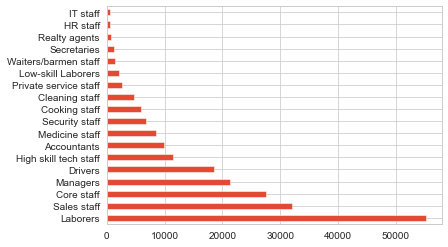

In [227]:
Application_df['OCCUPATION_TYPE'].value_counts().plot.barh()

In [228]:
Application_df['OCCUPATION_TYPE'].isnull().mean()*100

31.345545362604916

In [229]:
##The occupation column has nulls greater than 31.34 so imputing with mode is not recommanded so create seperate category called Missed

In [230]:
Application_df['OCCUPATION_TYPE'].fillna('missing',inplace=True)

In [231]:
####Again checking for missing value percentage 
(Application_df.isnull().mean()*100).sort_values(ascending = False)

EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4 

In [232]:
#This is list of columns having continuos data for imputation
Conti_For_Impute=[]
L3=Continuous_Data
L2=Imput_Data
for i in L3:
    if i in L2:
        Conti_For_Impute.append(i)

In [233]:
#List of columns having continuos data for imputation
Conti_For_Impute

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [234]:
#Lets Inspect all the categorical data set by value counts method to check that the list which we made by auotomated approach is right or not?
for i in Cat_For_Impute:
    print(i)
    print(Application_df[i].value_counts())

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64
DEF_30_CNT_SOCIAL_CIRCLE
0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64
DEF_60_CNT_SOCIAL_CIRCLE
0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64
AMT_REQ_CREDIT_BUREAU_HOUR
0.0    

In [235]:
##Inspect OCCUPATION_TYPE column that new category missed created or not 
Application_df['OCCUPATION_TYPE'].value_counts(normalize=True)*100

missing                  31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

In [236]:
#Lets Inspect all the Continuous data set by value counts method to check that the list which we made with auotmated approach is right or not?
for i in Conti_For_Impute:
    print(i)
    print(Application_df[i].value_counts())

AMT_ANNUITY
9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64
AMT_GOODS_PRICE
450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64
EXT_SOURCE_2
0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64
EXT_SOURCE_3
0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
0.581484    1141
0.689479    1138
0.595456    1136
0.554947    1132
0.621226    1109
0.657784    1092
0.607557    1067
0.643026    1066
0.45074

In [237]:
##imputing the mode for categorical data set values excpt "Occuptaion_Type" as for this column's nulls we created a category called "missing" 
for i in Cat_For_Impute:
    imp_val=Application_df[i].mode()[0]
    print(imp_val)
    Application_df[i]=Application_df[i].fillna(imp_val)
    

Unaccompanied
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [238]:
##Lets verify mode imputed or not 
for i in Cat_For_Impute:
    print(i)
    print((Application_df[i].isnull().mean())*100)
    

NAME_TYPE_SUITE
0.0
CNT_FAM_MEMBERS
0.0
DEF_30_CNT_SOCIAL_CIRCLE
0.0
DEF_60_CNT_SOCIAL_CIRCLE
0.0
AMT_REQ_CREDIT_BUREAU_HOUR
0.0
AMT_REQ_CREDIT_BUREAU_DAY
0.0
AMT_REQ_CREDIT_BUREAU_WEEK
0.0
AMT_REQ_CREDIT_BUREAU_MON
0.0
AMT_REQ_CREDIT_BUREAU_QRT
0.0
AMT_REQ_CREDIT_BUREAU_YEAR
0.0


In [239]:
###Now lets impute the values for continuous data 
#1)We we will impute the median if continuos data has outliers.
#2)We will impute the mean if continuous data doesn't have outlier.

AMT_ANNUITY


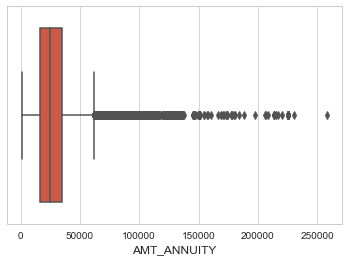

AMT_GOODS_PRICE


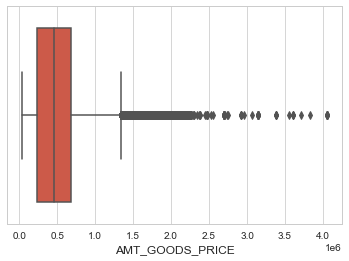

EXT_SOURCE_2


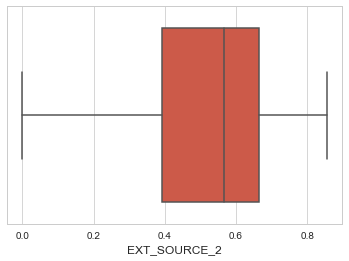

EXT_SOURCE_3


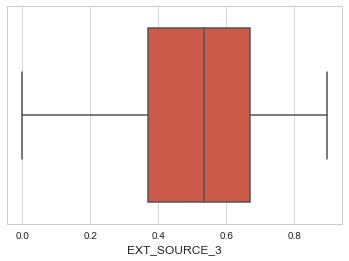

OBS_30_CNT_SOCIAL_CIRCLE


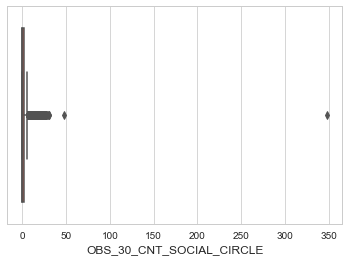

OBS_60_CNT_SOCIAL_CIRCLE


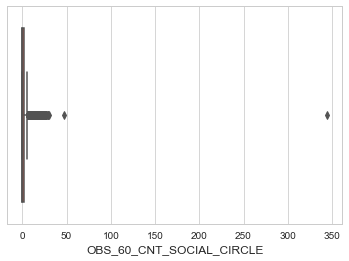

DAYS_LAST_PHONE_CHANGE


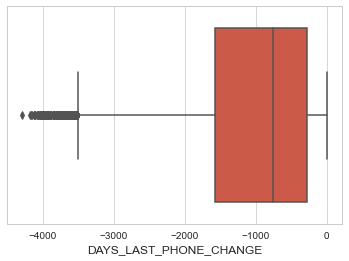

In [240]:
#Lets first check the outliers by plotting the box plot all the continous data remaining for imputation of nulls
for i in Conti_For_Impute:
    print(i)
    sns.boxplot(Application_df[i])
    plt.show()

In [241]:
##Lets impute the mean for the column which dont have outlier from above box plot we know that EXT_SOURCE_2 and EXT_SOURCE_3 Doesnt have the outlier so impute them with mean.

In [242]:
#Imputing mean in EXT_SOURCE_2
imp_val=Application_df["EXT_SOURCE_2"].mean()
Application_df["EXT_SOURCE_2"]=Application_df["EXT_SOURCE_2"].fillna(imp_val)

In [243]:
#Imputing mean in EXT_SOURCE_3
imp_val=Application_df["EXT_SOURCE_3"].mean()
Application_df["EXT_SOURCE_3"]=Application_df["EXT_SOURCE_3"].fillna(imp_val)

In [244]:
#Verifying the imputation
Application_df["EXT_SOURCE_2"].isnull().sum()

0

In [245]:
Application_df["EXT_SOURCE_3"].isnull().sum()

0

In [246]:
##Lets impute the median for the column which have outlier from above box plot we know that following columns have outliers so impute them with median
#1)AMT_ANNUITY
#2)AMT_GOODS_PRICE
#3)OBS_30_CNT_SOCIAL_CIRCLE
#4)OBS_60_CNT_SOCIAL_CIRCLE
#5)DAYS_LAST_PHONE_CHANGE

In [247]:
#Imputing mean in EXT_SOURCE_2
imp_val=Application_df["AMT_ANNUITY"].median()
Application_df["AMT_ANNUITY"]=Application_df["AMT_ANNUITY"].fillna(imp_val)

In [248]:
#Imputing mean in EXT_SOURCE_2
imp_val=Application_df["AMT_GOODS_PRICE"].median()
Application_df["AMT_GOODS_PRICE"]=Application_df["AMT_GOODS_PRICE"].fillna(imp_val)

In [249]:
#Imputing mean in EXT_SOURCE_2
imp_val=Application_df["OBS_30_CNT_SOCIAL_CIRCLE"].median()
Application_df["OBS_30_CNT_SOCIAL_CIRCLE"]=Application_df["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(imp_val)

In [250]:
#Imputing mean in EXT_SOURCE_2
imp_val=Application_df["OBS_60_CNT_SOCIAL_CIRCLE"].median()
Application_df["OBS_60_CNT_SOCIAL_CIRCLE"]=Application_df["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(imp_val)

In [251]:
#Imputing mean in EXT_SOURCE_2
imp_val=Application_df["DAYS_LAST_PHONE_CHANGE"].median()
Application_df["DAYS_LAST_PHONE_CHANGE"]=Application_df["DAYS_LAST_PHONE_CHANGE"].fillna(imp_val)

In [252]:
#Verifying the imputation
Application_df["AMT_ANNUITY"].isnull().sum()

0

In [253]:
Application_df["AMT_GOODS_PRICE"].isnull().sum()

0

In [254]:
Application_df["OBS_30_CNT_SOCIAL_CIRCLE"].isnull().sum()

0

In [255]:
Application_df["OBS_60_CNT_SOCIAL_CIRCLE"].isnull().sum()

0

In [256]:
Application_df["DAYS_LAST_PHONE_CHANGE"].isnull().sum()

0

#### Checking the nulls percentage after treatment of nulls

In [257]:
Application_df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

In [258]:
Application_df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [259]:
#Checking for gender column 
Application_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [260]:
#Dropping the XNA from gender column
Application_df = Application_df[~(Application_df['CODE_GENDER']=='XNA')]


In [261]:
Application_df.shape

(307507, 73)

#### After IMputing the nulls with mean/mode/median and replacing 31.43% Nulls in Occuptaion with missing Lets Check other parameters in important columns 

### 4.2 Fixing the incorrect values and standardising the values 

In [262]:
#Lets check for Days of birth column
Application_df['DAYS_BIRTH'].value_counts()

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-24898     1
-24868     1
-8017      1
-25098     1
-25061     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [263]:
Application_df['DAYS_BIRTH'].describe()

count    307507.000000
mean     -16037.027271
std        4363.982424
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [264]:
#Client age in no of days seems to be negative lets make it +ve
Application_df['DAYS_BIRTH']=abs(Application_df['DAYS_BIRTH'])

In [265]:
#Again check for client age 
Application_df['DAYS_BIRTH'].describe()

count    307507.000000
mean      16037.027271
std        4363.982424
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [266]:
#Customers no of days with current employer during applicaton process
Application_df['DAYS_EMPLOYED'].value_counts()

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-12588         1
-8229          1
-12794         1
-11823         1
-8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [267]:
Application_df['DAYS_EMPLOYED'].describe()

count    307507.000000
mean      63815.929208
std      141276.472519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [268]:
#Converting days employed -ve to +ve
Application_df['DAYS_EMPLOYED']=abs(Application_df['DAYS_EMPLOYED'])

In [269]:
#Veryfieng the conversion
Application_df['DAYS_EMPLOYED'].describe()

count    307507.000000
mean      67725.569893
std      139444.469301
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [270]:
#Checking for "Days Registration"
Application_df['DAYS_REGISTRATION'].value_counts()

-1.0        113
-7.0         98
-6.0         96
-4.0         92
-2.0         92
           ... 
-15581.0      1
-15031.0      1
-14804.0      1
-15008.0      1
-14798.0      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64

In [271]:
Application_df['DAYS_REGISTRATION'].describe()

count    307507.000000
mean      -4986.131376
std        3522.883030
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [272]:
#Converting the -ve to +ve for days_registartion
Application_df['DAYS_REGISTRATION']=abs(Application_df['DAYS_REGISTRATION'])

In [273]:
##Verified that conversion from -ve to +ve done or not
Application_df['DAYS_REGISTRATION'].describe()

count    307507.000000
mean       4986.131376
std        3522.883030
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [274]:
#Days Id Publish
Application_df['DAYS_ID_PUBLISH'].describe()

count    307507.000000
mean      -2994.201670
std        1509.454566
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [275]:
#Converting from -Ve to +ve 
Application_df['DAYS_ID_PUBLISH']=abs(Application_df['DAYS_ID_PUBLISH'])

In [276]:
#Verifying the conversion
Application_df['DAYS_ID_PUBLISH'].describe()

count    307507.000000
mean       2994.201670
std        1509.454566
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [277]:
#Checking for the Days_Last_Phone_change
Application_df['DAYS_LAST_PHONE_CHANGE'].value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [278]:
#Convert it into the the +ve value 

In [279]:
Application_df['DAYS_LAST_PHONE_CHANGE']=abs(Application_df['DAYS_LAST_PHONE_CHANGE'])

In [280]:
#Verifying the conversion
Application_df['DAYS_LAST_PHONE_CHANGE'].describe

<bound method NDFrame.describe of 0         1134.0
1          828.0
2          815.0
3          617.0
4         1106.0
           ...  
307506     273.0
307507       0.0
307508    1909.0
307509     322.0
307510     787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307507, dtype: float64>

In [281]:
Application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [282]:
#All -ve converted to +ve values

In [283]:
Application_df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [284]:
##Modifying the data types of categorical columns

In [285]:
Application_df['REG_CITY_NOT_LIVE_CITY'] = Application_df['REG_CITY_NOT_LIVE_CITY'].astype(object)
Application_df['LIVE_CITY_NOT_WORK_CITY']=Application_df['LIVE_CITY_NOT_WORK_CITY'].astype(object)
Application_df['REG_CITY_NOT_WORK_CITY'] = Application_df['REG_CITY_NOT_WORK_CITY'].astype(object)
Application_df['LIVE_REGION_NOT_WORK_REGION'] = Application_df['LIVE_REGION_NOT_WORK_REGION'].astype(object)
Application_df['REG_REGION_NOT_WORK_REGION'] = Application_df['REG_REGION_NOT_WORK_REGION'].astype(object)
Application_df['REG_REGION_NOT_LIVE_REGION'] = Application_df['REG_REGION_NOT_LIVE_REGION'].astype(object)

In [286]:
#Verifiying the data type converted
Application_df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

### 4.3 Handling the Outliers

### Outlier treatment 
Solution 1 --> Deleting the data with outliers (Not Good)

Solution 2 --> 

(i) Capping : We will cap upper bound outliers equal to upper bound

(ii) Flooring :We will floor lower bound outliers equal to lower bound

In [287]:
Application_df.AMT_ANNUITY.describe()

count    307507.000000
mean      27108.580714
std       14493.522125
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

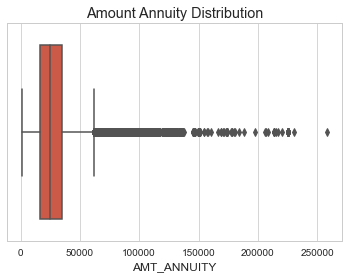

In [288]:
sns.boxplot(Application_df.AMT_ANNUITY)
plt.title('Amount Annuity Distribution')
plt.show()

In [289]:

#Outlier treatment we will cap the upper 
#Solution 1 --> Deleting the data with outliers (Not Good)
#Solution 2 --> 
#(i) Capping : We will cap upper bound outliers equal to upper bound
#(ii) Flooring :We will floor lower bound outliers equal to lower bound
q1=Application_df["AMT_ANNUITY"].describe()["25%"]
q3=Application_df["AMT_ANNUITY"].describe()["75%"]
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound,upper_bound
Application_df["AMT_ANNUITY"]=np.where(Application_df["AMT_ANNUITY"]>upper_bound,upper_bound,Application_df["AMT_ANNUITY"])
Application_df["AMT_ANNUITY"]=np.where(Application_df["AMT_ANNUITY"]<lower_bound,lower_bound,Application_df["AMT_ANNUITY"])

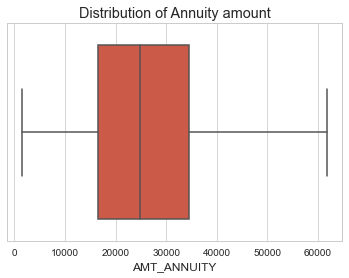

In [290]:
sns.boxplot(Application_df.AMT_ANNUITY)
plt.title('Distribution of Annuity amount')
plt.show()

In [291]:
Application_df.AMT_INCOME_TOTAL.describe()

count    3.075070e+05
mean     1.687977e+05
std      2.371246e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

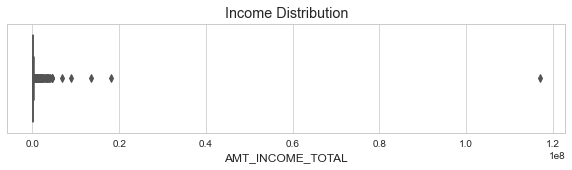

In [292]:
plt.figure(figsize=(10,2))
sns.boxplot(Application_df.AMT_INCOME_TOTAL)
plt.title('Income Distribution')
plt.show()

In [293]:
q1=Application_df["AMT_INCOME_TOTAL"].describe()["25%"]
q3=Application_df["AMT_INCOME_TOTAL"].describe()["75%"]
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound,upper_bound
Application_df["AMT_INCOME_TOTAL"]=np.where(Application_df["AMT_INCOME_TOTAL"]>upper_bound,upper_bound,Application_df["AMT_INCOME_TOTAL"])
Application_df["AMT_ANNUITY"]=np.where(Application_df["AMT_ANNUITY"]<lower_bound,lower_bound,Application_df["AMT_ANNUITY"])

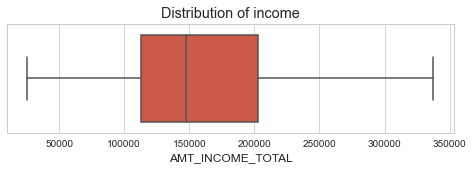

In [294]:
plt.figure(figsize=(8,2))
sns.boxplot(Application_df.AMT_INCOME_TOTAL)
plt.title('Distribution of income')
plt.show()

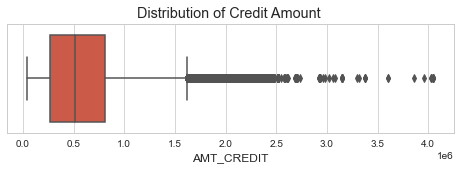

In [295]:
plt.figure(figsize=(8,2))
sns.boxplot(Application_df.AMT_CREDIT)
plt.title('Distribution of Credit Amount ')
plt.show()

In [296]:
q1=Application_df["AMT_CREDIT"].describe()["25%"]
q3=Application_df["AMT_CREDIT"].describe()["75%"]
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound,upper_bound
Application_df["AMT_CREDIT"]=np.where(Application_df["AMT_CREDIT"]>upper_bound,upper_bound,Application_df["AMT_CREDIT"])
Application_df["AMT_CREDIT"]=np.where(Application_df["AMT_CREDIT"]<lower_bound,lower_bound,Application_df["AMT_CREDIT"])

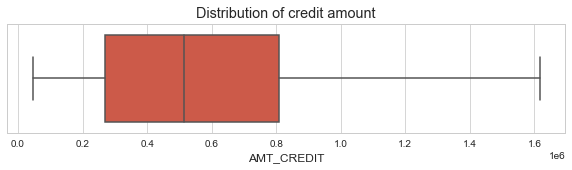

In [297]:
plt.figure(figsize=(10,2))
sns.boxplot(Application_df.AMT_CREDIT)
plt.title('Distribution of credit amount')
plt.show()

In [298]:
Application_df.DAYS_BIRTH.describe()

count    307507.000000
mean      16037.027271
std        4363.982424
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

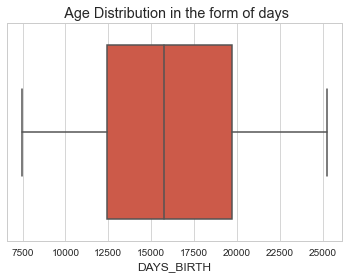

In [299]:
sns.boxplot(Application_df.DAYS_BIRTH)
plt.title(' Age Distribution in the form of days')
plt.show()

In [300]:
Application_df.DAYS_EMPLOYED.describe()

count    307507.000000
mean      67725.569893
std      139444.469301
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

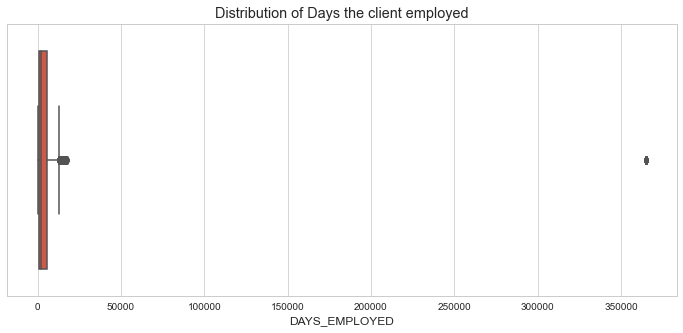

In [301]:
plt.figure(figsize=(12,5))
sns.boxplot(Application_df.DAYS_EMPLOYED)
plt.title('Distribution of Days the client employed')
plt.show()

In [302]:
q1=Application_df["DAYS_EMPLOYED"].describe()["25%"]
q3=Application_df["DAYS_EMPLOYED"].describe()["75%"]
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound,upper_bound
Application_df["DAYS_EMPLOYED"]=np.where(Application_df["DAYS_EMPLOYED"]>upper_bound,upper_bound,Application_df["DAYS_EMPLOYED"])
Application_df["DAYS_EMPLOYED"]=np.where(Application_df["DAYS_EMPLOYED"]<lower_bound,lower_bound,Application_df["DAYS_EMPLOYED"])

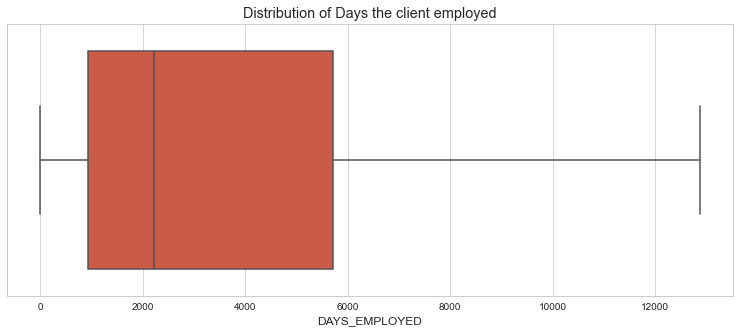

In [303]:
plt.figure(figsize=(13,5))
sns.boxplot(Application_df.DAYS_EMPLOYED)
plt.title('Distribution of Days the client employed')

plt.show()

### 5 Bucketing the Continuos Variables in categories

##### 5.1 Binning of Customer income in different ranges

In [304]:
Application_df['INCOME_RANGE']=pd.cut(Application_df['AMT_INCOME_TOTAL'],                 
                         bins = [0,100000,200000,500000,1000000,5000000], labels=['0L-1L','1L-2L', '2L-5L','5L-10L','10L-50L'])

In [305]:
Application_df['INCOME_RANGE'].value_counts().head(10)

1L-2L      155896
2L-5L       87913
0L-1L       63698
5L-10L          0
10L-50L         0
Name: INCOME_RANGE, dtype: int64

#### 5.2 AGE Binning into different catgories

In [306]:
Application_df['DAYS_BIRTH']= (Application_df['DAYS_BIRTH']/365).astype(int)
Application_df['AGE_BINS']=pd.cut(Application_df['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['19 to 25','25 to 35', 'Middle Age_35 to 60', 'Senior Citizen 60+'])

In [307]:
Application_df['AGE_BINS'].value_counts().head(10)

Middle Age_35 to 60    185898
25 to 35                75923
Senior Citizen 60+      29368
19 to 25                16318
Name: AGE_BINS, dtype: int64

#### 5.3 Credit amount bucketing in different ranges

In [308]:
bins = [0,100000,300000,500000,1000000,2000000,4000000]
slot =['0L-1L','1L-3L', '3L-5L','5L-10L','10L-20L','20L-40L']

Application_df['CREDIT_RANGE']=pd.cut(Application_df['AMT_CREDIT'],bins,labels=slot)

In [309]:
Application_df['CREDIT_RANGE'].value_counts().head(10)

5L-10L     108192
1L-3L       84952
3L-5L       58374
10L-20L     49985
0L-1L        6004
20L-40L         0
Name: CREDIT_RANGE, dtype: int64

#### 5.4 Goods Price binning in different ranges

In [310]:
Application_df['GOODS_PRICE_RANGE']=pd.cut(Application_df['AMT_GOODS_PRICE'],bins = [0,100000,300000,500000,1000000,2000000,4000000,5000000],labels =['0L-1L','1L-3L', '3L-5L','5L-10L','10L-20L','20L-40L','40L+'])



In [311]:
Application_df['GOODS_PRICE_RANGE'].value_counts().head(10)

1L-3L      95715
5L-10L     90495
3L-5L      78469
10L-20L    33026
0L-1L       8709
20L-40L     1085
40L+           8
Name: GOODS_PRICE_RANGE, dtype: int64

#### 6)Segementing the data based on target variable and checking imbalance in data

#### 6.1 Segementing the Application data in two data frame

In [312]:
loan_Paid_0=Application_df[Application_df['TARGET']==0] #person who paid the loan on time called as non defaluter
loan_Not_1=Application_df[Application_df['TARGET']==1] #person who doesnt pay the loan on time called as defaulter

#### 6.2 Data Imbalance

In [313]:
#Imbalance in data
100*Application_df['TARGET'].value_counts(normalize=True)

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

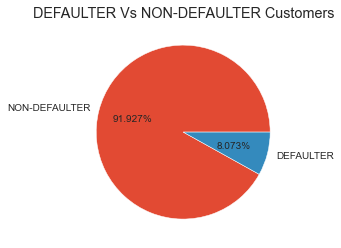

In [314]:
plt.pie(Application_df['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULTER','DEFAULTER'],autopct='%1.3f%%')
plt.title('DEFAULTER Vs NON-DEFAULTER Customers')
plt.show()


###### we can conclude here that 91.92% of people here make timely payments and only 8.07% face challenges.

## 7. Segmented Univariate analysis

#### 7.1 Segmented categorical univariate analysis

#### 7.1.1Analysis of income range with count plot

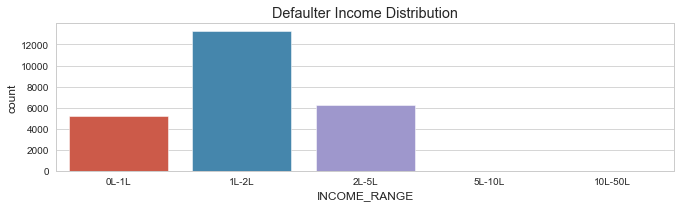

In [315]:
#Count plot to know the income distribution of defaulter
plt.figure(figsize = (18, 5))
plt.subplot(2, 2, 2)
plt.title('Defaulter Income Distribution')
plt.tight_layout()
sns.countplot(loan_Not_1['INCOME_RANGE'])
plt.show()

#### We can conclude from above bar plot that people with income range 1-2lakhs more likely to default

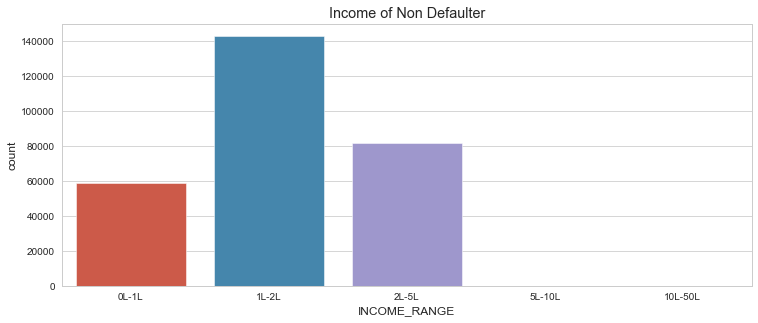

In [316]:
# Count plot to know the income distribution of non-defaulter
plt.figure(figsize = (20, 8))
plt.subplot(2, 2, 1)
plt.tight_layout()
plt.title('Income of Non Defaulter')
sns.countplot(loan_Paid_0['INCOME_RANGE'])
plt.show()

##### We can conclude from above count plot that people with income range 1-2lakhs more likely to repay

##### BY above graph we can see income category 1-2lakhs more likly to apply for loans and it is more likly to defualt as well as  more likly to repay as compare to other category but we cannot conclude the rate of defualting with compare to each category for this we will make bar plot in percentage.

#### Making Function for countplot in percentage for better clarity

In [317]:
#Making the function for plotting the bar and percentage on it for better clarity interms of paying and defualting rate
def plot_for_Uni(var_1):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,8))
    
    sns.countplot(x=var_1, data=loan_Paid_0,ax=ax1)
    ax1.set_ylabel('Total_Counts')
    ax1.set_title(f'Distributions of {var_1} for Non-Defaulters Customers',fontsize=20)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="center")
    
    # Adding the normalized percentage 
    for x in ax1.patches:
        ax1.annotate('{:.1f}%'.format((x.get_height()/len(loan_Paid_0))*100), (x.get_x()+0.1, x.get_height()+50))
        
    sns.countplot(x=var_1, data=loan_Not_1,ax=ax2)
    ax2.set_ylabel('Total_Counts')
    ax2.set_title(f'Distributions of {var_1} for Defaulters Customers',fontsize=20)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="center")
    
    # Adding the normalized percentage 
    for x in ax2.patches:
        ax2.annotate('{:.1f}%'.format((x.get_height()/len(loan_Not_1))*100), (x.get_x()+0.1, x.get_height()+50))
    
    plt.show()
    

In [318]:
#After making function for percentage analysis the income data 

##### 7.1.2 Income analysis for dfeualter and non-defaulter percentage wise comparesion

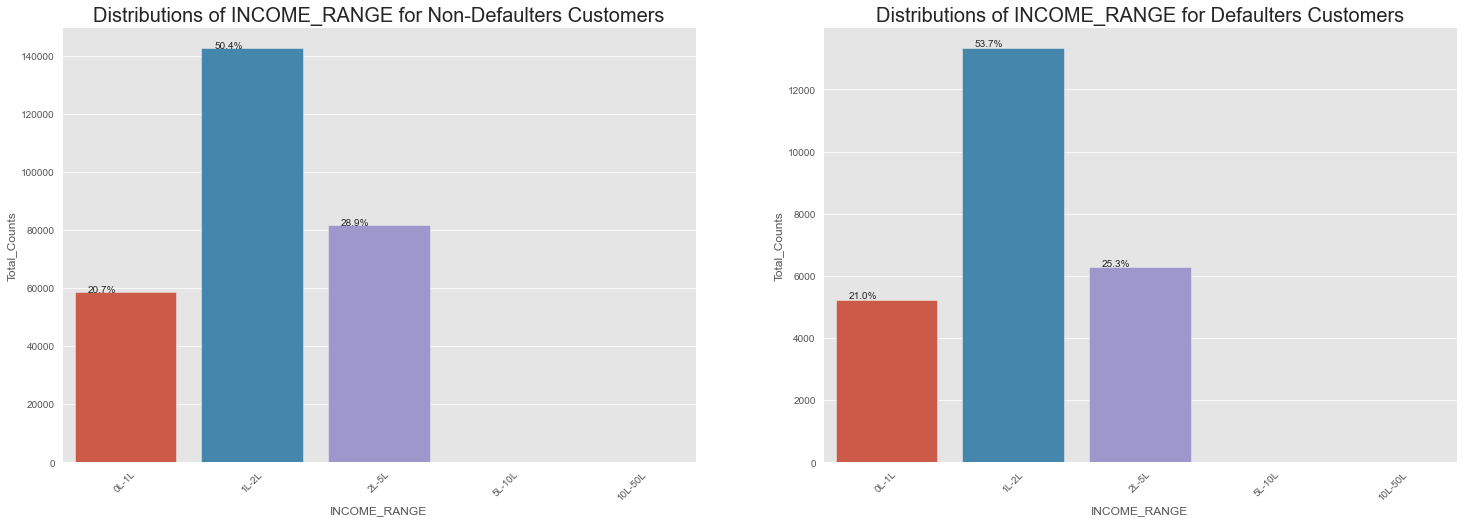

In [319]:
plot_for_Uni("INCOME_RANGE")

#### We can see that income range 1-2 lakhs having 50.4% in Non-Defaulters and 53.7% in Defaulter obiousaly they are more in applying the loans but 0L-1L are  almost same percentage in re-paying and defualting and 2L to 5L range are more percentage in repaying the loan but less in percentage in defualting  ****But income range 1L-2L is is 53.7% in defaulting as compare to 50.4% in repaying so this range is more at risk of giving the loans***

##### So percentage wise comparasion is better as compare to absolute value then we can know the better picture of data and then we can compare the rate of repaying vs defaulting for each category 

#### Conclusion:
1)Giving loans to income range 2-5L is better

2)Giving lons to income range of 1-2L is at risk.

#### 7.1.3 Credit Range analysis for defaluter and non-defaulter

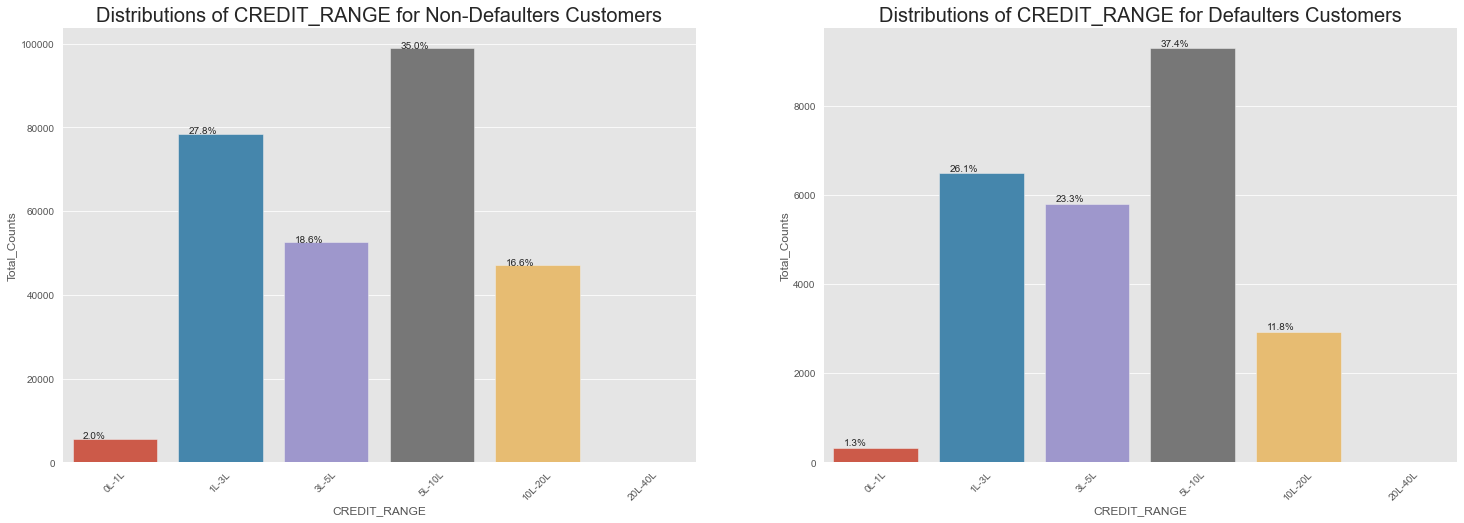

In [320]:
plot_for_Uni('CREDIT_RANGE')

##### We can see that credit range 5-10lakhs having 35% in Non-Defaulters and 37.4% in Defaulter obiousaly they are more in applying the loans but 0L-1L and 1L to 3L are more in percentage for repaying the loans as compare to defaulting and same for 10L to 20L are also more in percentage for repaying vs defaulting ***BUT 5L-10L is more in defaulting and less in repaying so this category of credit  amount is at risk for giving the loans

##### Conclusion:
1)We can conclude from above bar plot that people with credit amount in range 3L to 10 Lmore likely to default.

2)0 to 3L and 10 to 20L less likly to default

##### 7.1.4 Education wise analysis

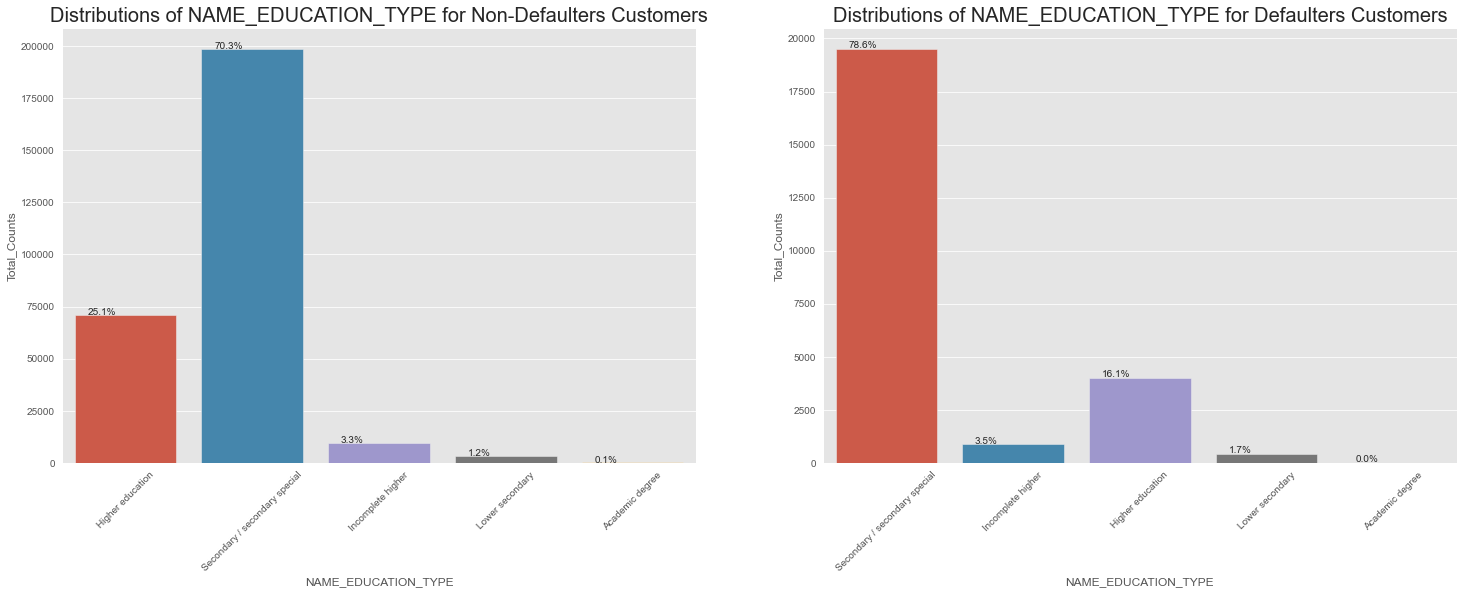

In [321]:
plot_for_Uni('NAME_EDUCATION_TYPE')

#### We can see that in education category Secondary/Secondary special having 70.3% in Non-Defaulters and 78.6% in Defaulter obiousaly they are more in applying the loans but Higher education and Acdamic degree are more in percentage for repaying the loans as compare to defaulting***BUT  Secondary/Secondary special is more in defaulting and less in repaying so this category of education type is at risk for giving the loans and incomplete higher and lower secondary as well same more percentage for defaulting less for non-defaulting

#### We can conclude from above bar plot that:
#### 1)Secondary/Secondary special and incomplete higher and lower secondary are more likly to defualt and at risk of giving the loans 
#### 2)Higher education and Acdamic degree are more likly to repay the loan

#### 7.1.5 Age wise analysis for defaluter and non-defaulter

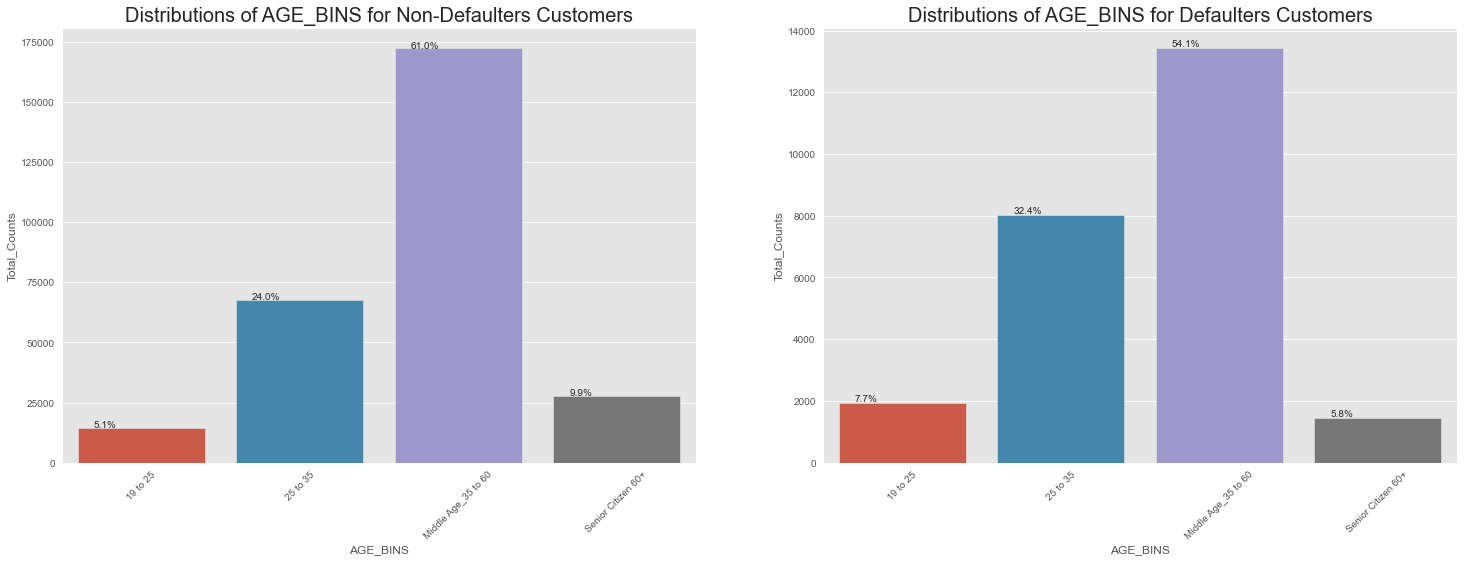

In [322]:
plot_for_Uni('AGE_BINS')

#### We can see from the above graph that Middle age person(35 to 60)  are 61.0% in Non-defaulting category and 54.1% in defaulting category it means they are more likly to apply for loans as well they are more likly to re-pay the loans same case is for senior citizen(60+)their percentage in repay is more and their percentage in defaulter is less so they also morfe likly to re-pay the loans. Teens(19-25) and adults(25-35) are having more percentage in default as compare to non default.

We can conclude from above bar plot that:

1)Teens(19-25) and adults(25-35) are more likly to default so risk of giving the loan is more.

2)Middle age(35-60) and senior citizen(60+) are less likly to default.

#### 7.1.6  Region wise analysis of defaulter vs non-defaulter

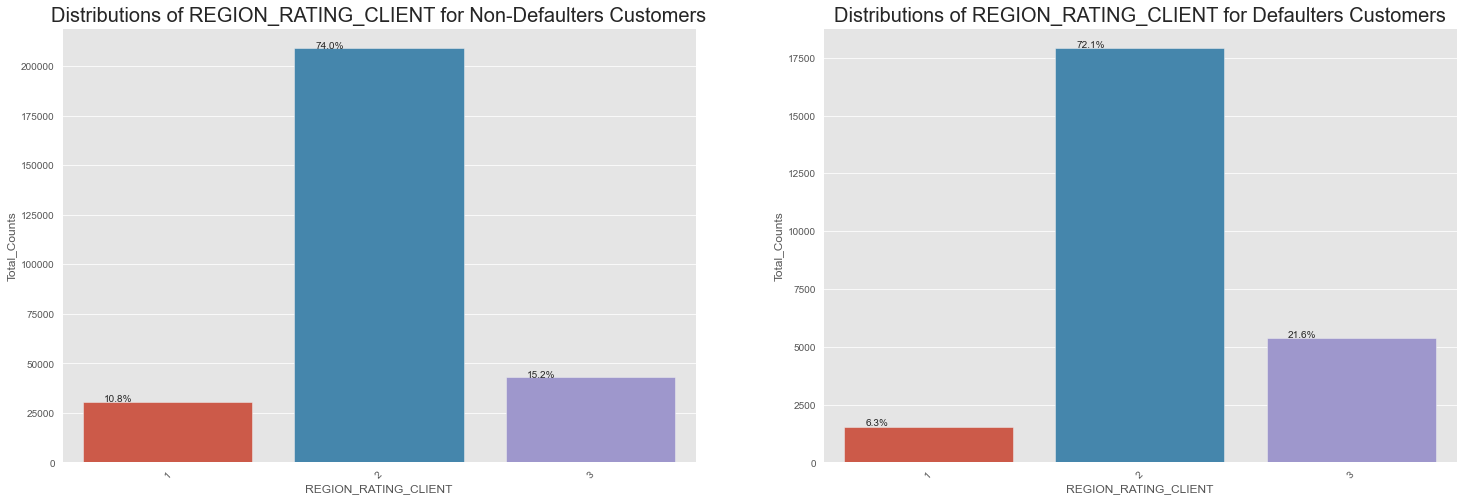

In [323]:
plot_for_Uni('REGION_RATING_CLIENT')

#### We can see that people living in  region with rating-2 are applying for the loans are more  and We can see that people living in  areas with Rating 3 tend contribute more to the defaulters by their weightage. People living in 1 rated areas are less likly to default

We can conclude from above bar plot that:

1)Persons living in region with rating 2 areapplying for the loans are more.

2)Persons living in region with rating 3 are more likly to default so risk of giving the loan is more.

3)Persons living in region with rating 1 are less likly to default.

4)Persons living in region with rating 2 are also less likly to default

#### 7.1.7 Analysing the day on which customer started the application process

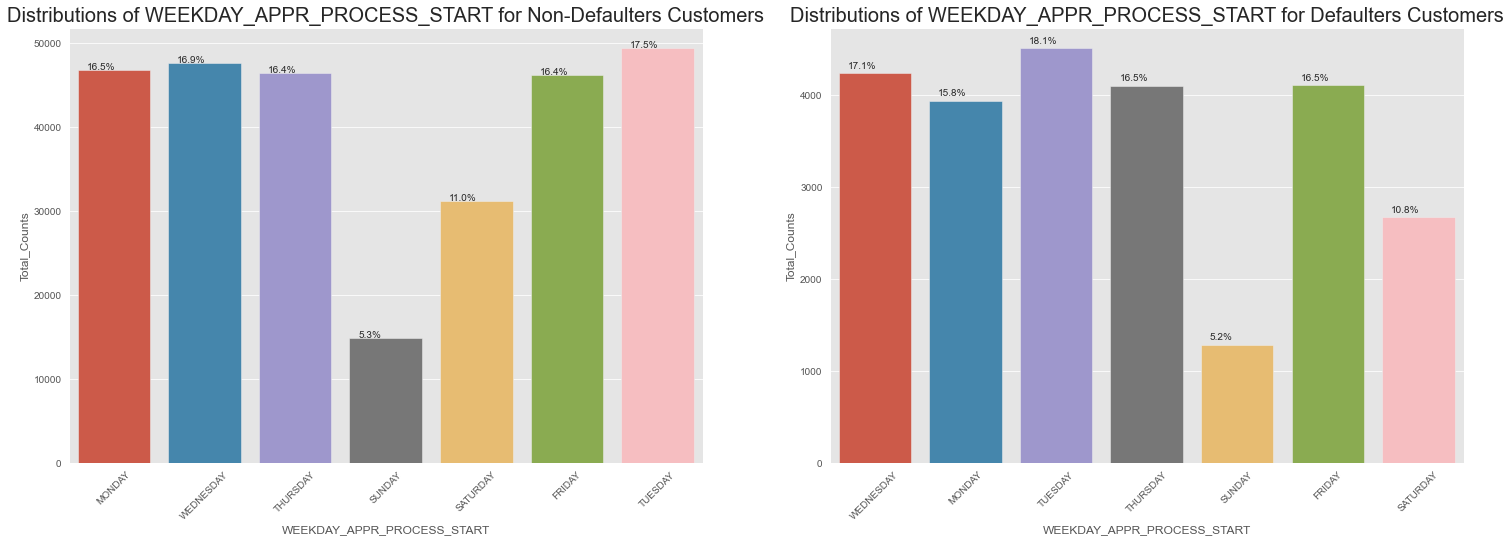

In [324]:
plot_for_Uni("WEEKDAY_APPR_PROCESS_START")

#### We can see from above graph The day on which he apply the loan is not affecting much in default and non default. people less likly to apply for loans on sunday and saturday as these days are weekly offs.

#### 7.1.8 Analysing based on the family status defaulter vs non-defaulter

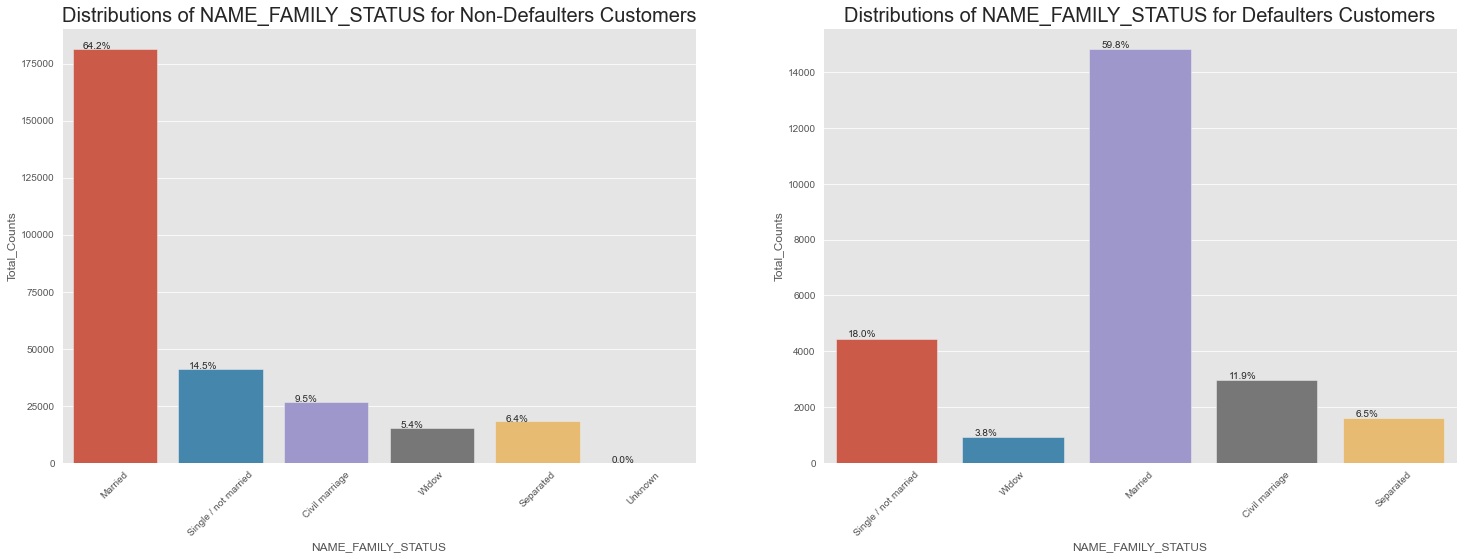

In [325]:
plot_for_Uni('NAME_FAMILY_STATUS')

We can see that in Family Status category Married having 64.2% in Non-Defaulters and 59.8% in Defaulter obiousaly they are more in applying the loans but  **Percentagae of repaying is more as compare to defualter for married and widow guys so they are at less risk of loan and percentage of repaying is less as compare to defulter for single/unmarried and civil marriage so they are more risk for loan**

***We can conclude from above bar plot that:***

**1)Single/Unmarried and civil marrige more likely to defualt so they are at risk of giving the loans***

**2)Married and widow are more likly to re-pay th loan so they are at less risk of givings the loan***

#### 7.1.9 Analysing gender wise for defaulter vs non-defaulter

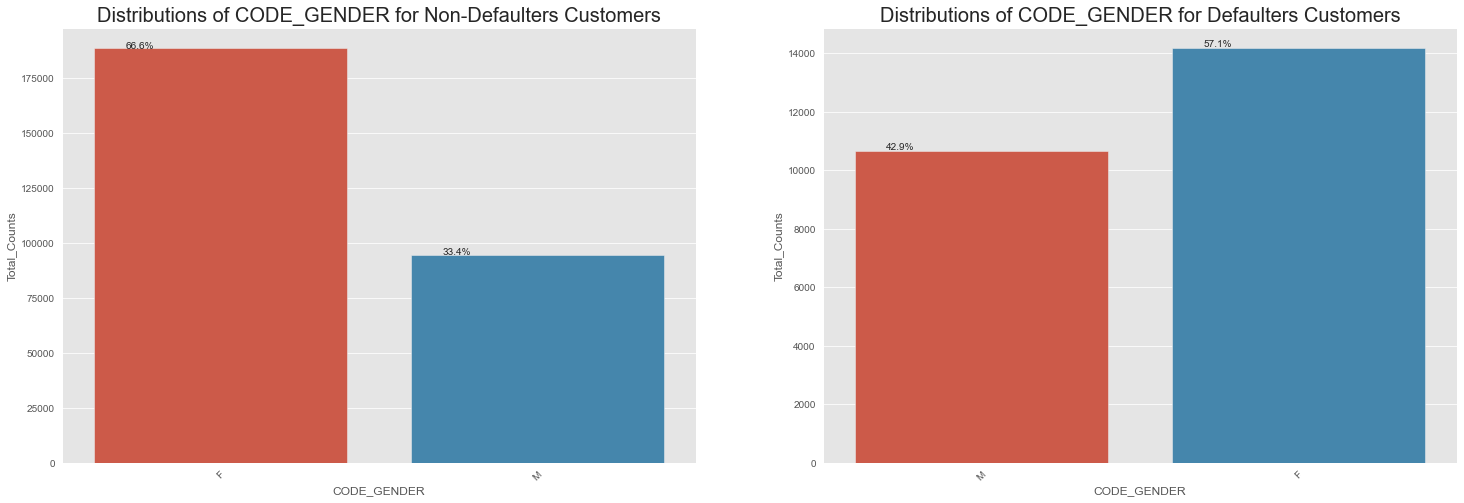

In [326]:
plot_for_Uni('CODE_GENDER')

#### We can see that in Gender Status category Female having 66.6% in Non-Defaulters and 57.1% in Defaulter obiousaly they are more in applying the loans but Percentagae of repaying is more as compare to defualter for female  so they are at less risk of giving loan and percentage of repaying is less as compare to defulter for male so they are more risk for loan

### We can conclude from above bar plot that:

##### 1)Male more likely to defualt so they are at risk of giving the loans*

##### 2)Female more likly to re-pay th loan so they are at less risk of givings the loan*

##### 7.1.10 Analysing the customer who owns the car

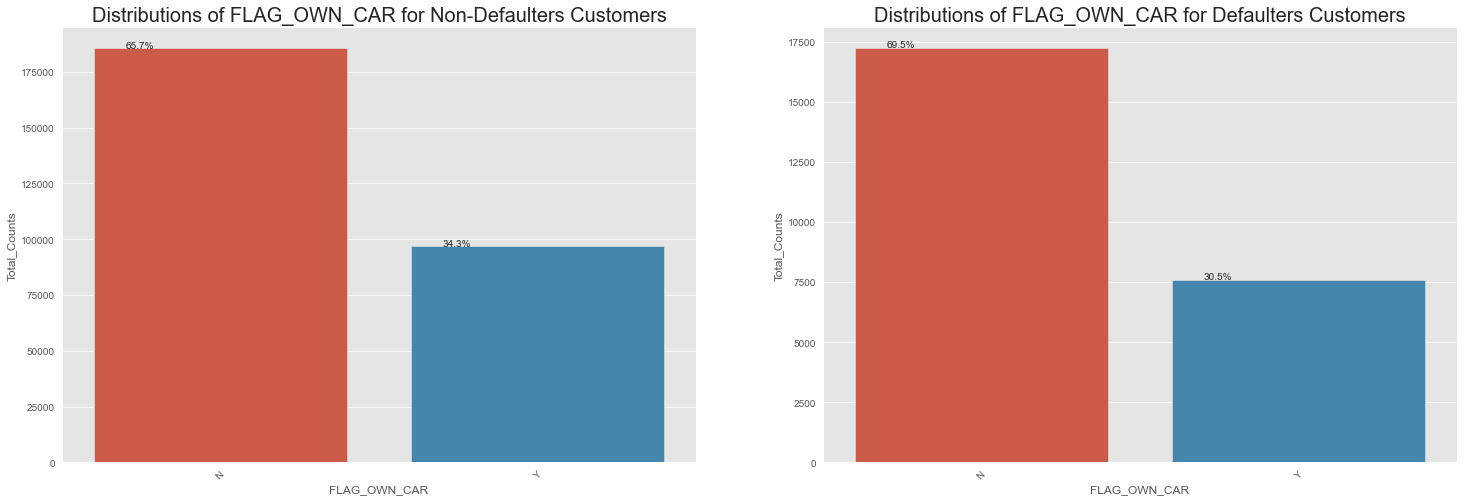

In [327]:
plot_for_Uni('FLAG_OWN_CAR')

#### We can see that in Car Status category people who don't own car having 65.7% in Non-Defaulters and 69.5% in Defaulter obiousaly they are more in applying the loans but Percentagae of repaying is more as compare to defualter for people who owns car so they are at less risk of giving loan and percentage of repaying is less as compare to defulter for people who dont own car so they are more risk for loan

##### We can conclude from above bar plot that:¶
1)The people who don't owns car are more likely to defualt so they are at risk of giving the loans*

2)The people who owns car are more likly to re-pay the loan so they are at less risk of givings the loan*

###### 7.1.11  Analysing based on income type for defaulter vs non-defaulter

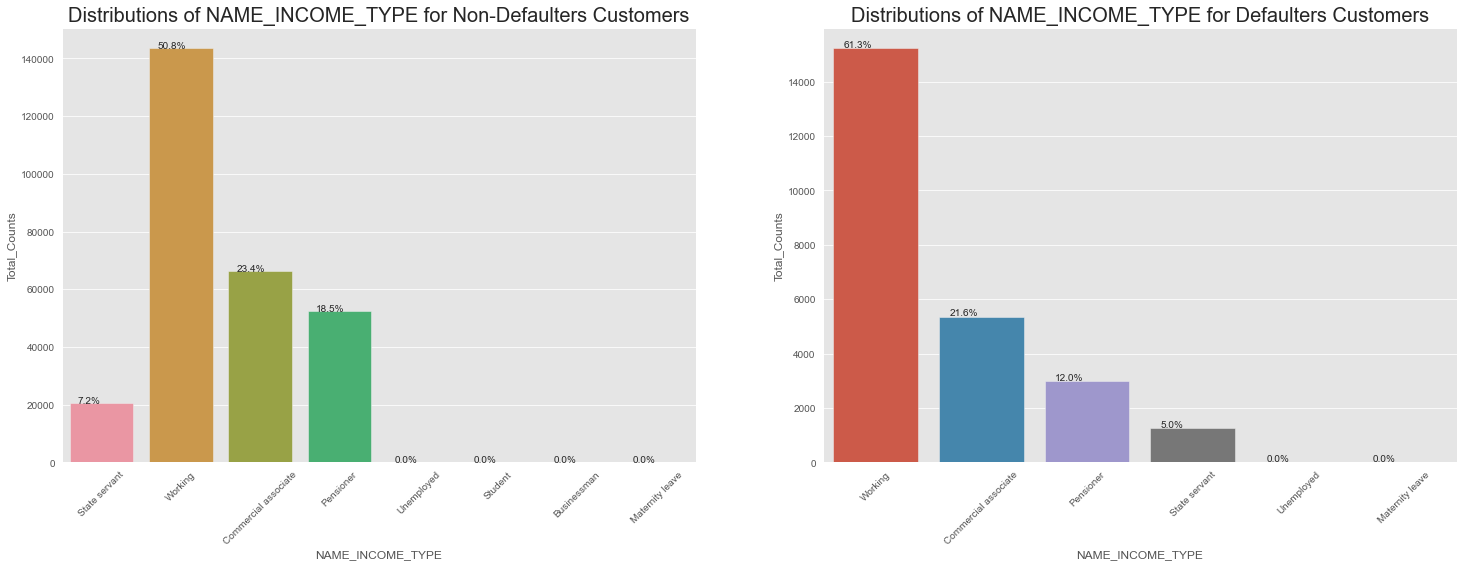

In [328]:
plot_for_Uni('NAME_INCOME_TYPE')

##### We can see that working class is  50.8% in non-defaulter and 61.3% in defaulter so they are in more number applying the loans but their percentage in default category is more as compare to non-default so they are more likly to default and State servant and commercial assosiate and pensioner having more percentage in re-pay and less percentage in defaulter so they are at less risk of giving the loans.

#### We can conclude from above bar plot that:
1)The working class are more likely to defualt so they are at risk of giving the loans*

2)The state servant and commercial assosiate and pensioner are  more likly to re-pay the loan so they are at less risk of givings the loan*

##### 7.1.12 Analysing based on House type for defualter vs non-defaulter

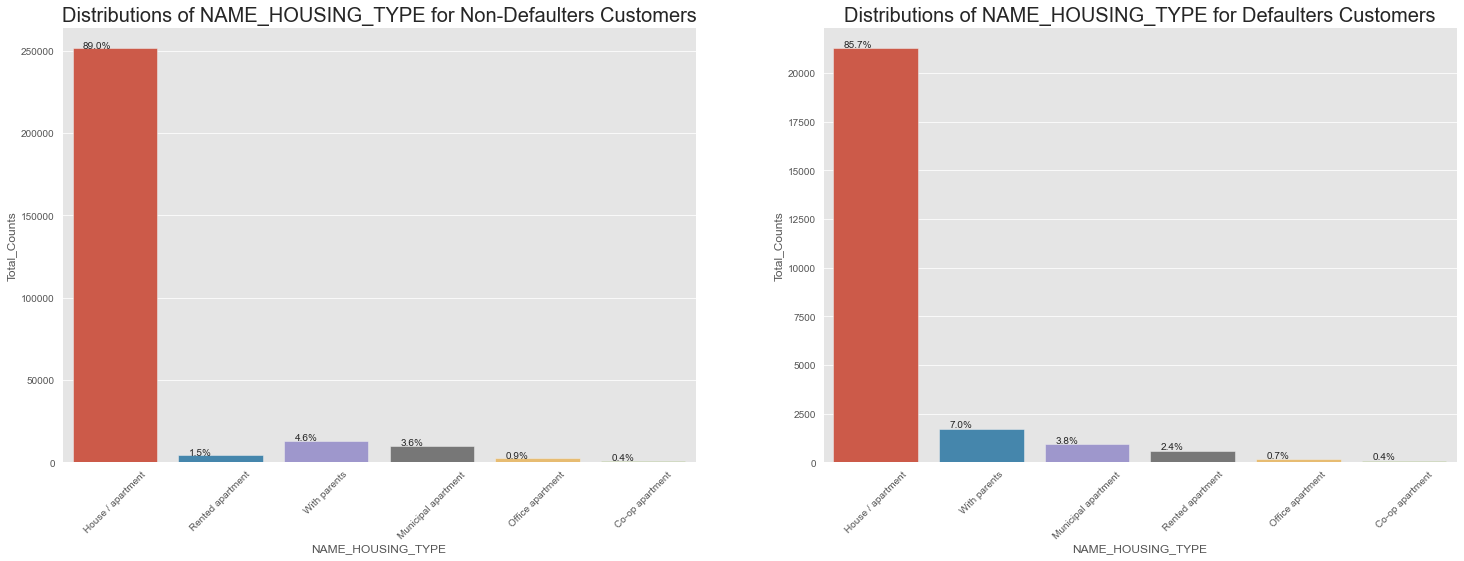

In [329]:
plot_for_Uni("NAME_HOUSING_TYPE")

#### We can see that people with house/appartment are applying for loas are more as compare to others as their percentage in non defualt is 89.0% and in default category their percentage is 85.7%. The persons living with parents are more in percentage in defaulting category and less in percentage in non-defaulting category so we can say they are more likly to default.

We can conclude from above bar plot that:

1)The persons who are living with parents and peoples who are living in rented house  are more likely to defualt so they are at risk of giving the loans*

2)The persons living in house/appartment are more likly to repay as compare to default so they are at less risk of giving the loans.

3)Muncipal appartment and office appartment and co_op appartment are almost same in both default and non default category 

#### 7.1.13 Analysing based on Occupation type for defaulter vs non-defaulter

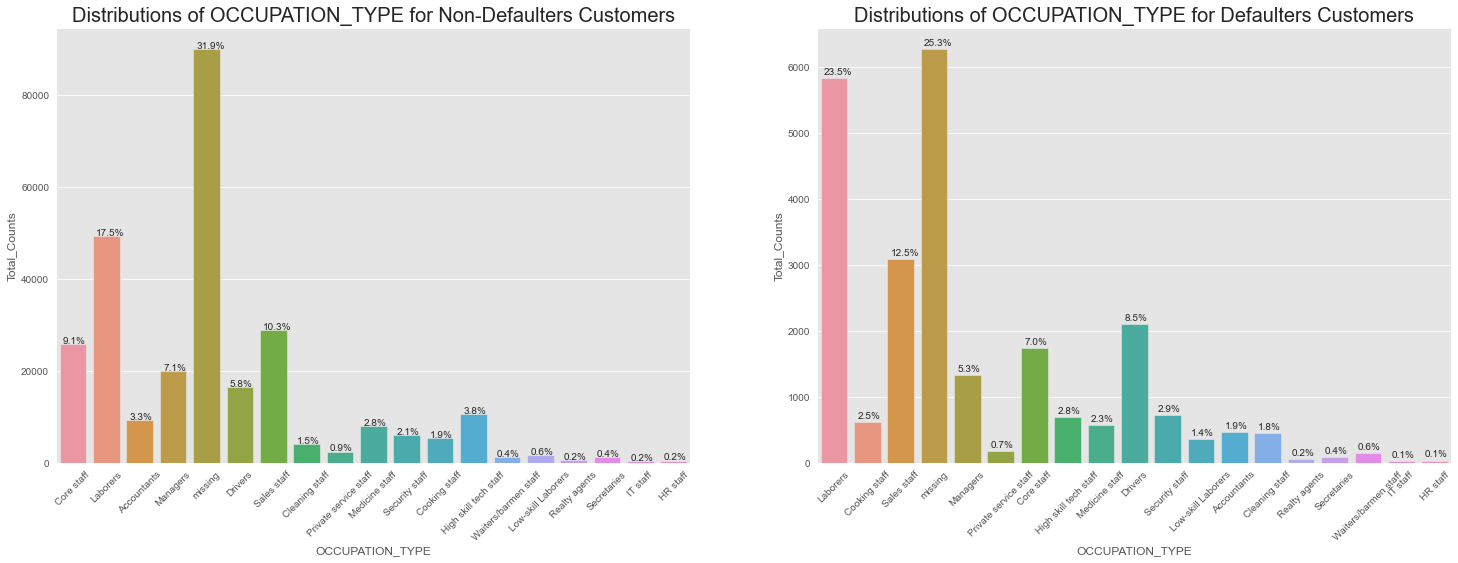

In [330]:
plot_for_Uni("OCCUPATION_TYPE")

##### Following things We can conclude from the above graph:
1)Laborers are more in numbers for applying the loans as compare to other category and they are more in percentage in default category as compare to non default so they are more likly to defualt.)

2)Drivers are more in percentage in default category as compare to non default so they are more likly to defualt.

3)Cooking and cleaning staff are more in percentage in default category as compare to non default so they are more likly to
defualt.

4)Security staff are more in percentage in default category as compare to non default so they are more likly to defualt.

5)Low skill laborers and Waiters/Barmen are more in percentage in default category as compare to non default so they are more likly to defualt

6)Managers/Accountent/Corestaff/IT/HR staff are more in percentage in non-default category as compare to default so they are less likly to defualt.

In [331]:
Application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,AGE_BINS,CREDIT_RANGE,GOODS_PRICE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637.0,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2L-5L,19 to 25,3L-5L,3L-5L
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188.0,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2L-5L,Middle Age_35 to 60,10L-20L,10L-20L
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225.0,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0L-1L,Middle Age_35 to 60,1L-3L,1L-3L
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039.0,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,Middle Age_35 to 60,3L-5L,1L-3L
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038.0,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,Middle Age_35 to 60,5L-10L,5L-10L


#####  7.1.14 Analysing based on the Count of family members

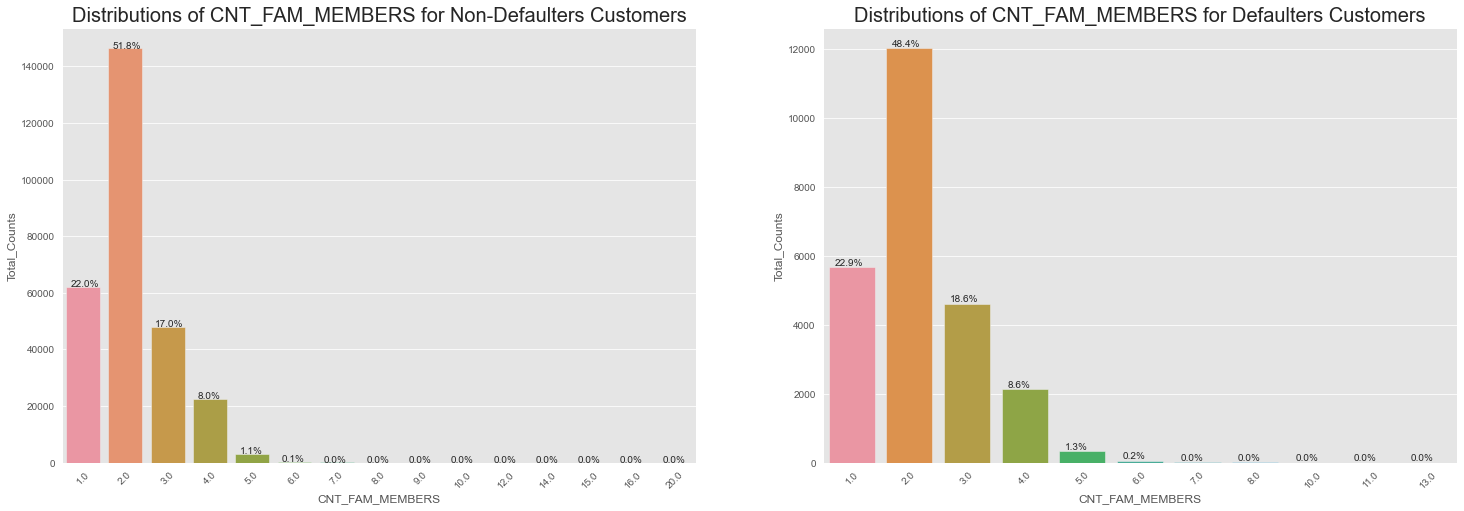

In [332]:
plot_for_Uni("CNT_FAM_MEMBERS")

#### We can conclude that person most of the loan applicants were having 2number of family member.
1)The person with 2 family member less likly to default.

2)The person with 3-4-5 family member more likly to defualt.

### 8) Continuos univariate analysis

#### 8.1 analysing the Annuity amount for defaulter vs non-defaulter

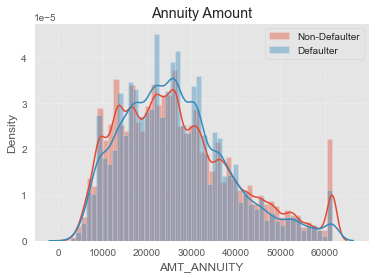

In [333]:
sns.distplot(loan_Paid_0['AMT_ANNUITY'], hist = True, label="Non-Defaulter")
sns.distplot(loan_Not_1['AMT_ANNUITY'], hist = True, label="Defaulter")
plt.title('Annuity Amount')
plt.grid(color='White', linestyle='--', linewidth=0.50, alpha=0.6) 
plt.legend()
plt.show()

#### The persons who are applying for loans are mostly having the annuity amount range between 10k to 40k

#### 8.2 analysing the No of days employed while for current employment  for defaulter vs non-defaulter

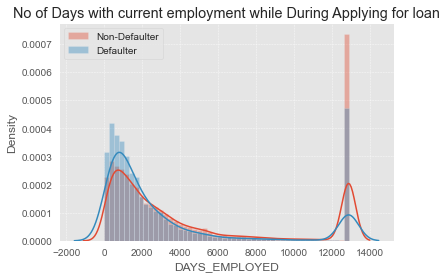

In [334]:
sns.distplot(loan_Paid_0['DAYS_EMPLOYED'], hist = True, label="Non-Defaulter")
sns.distplot(loan_Not_1['DAYS_EMPLOYED'], hist = True, label="Defaulter")
plt.title('No of Days with current employment while During Applying for loan')
plt.grid(color='White', linestyle='--', linewidth=0.50, alpha=0.8) 
plt.legend()
plt.show()

#### 1)Persons with 0-2000days(Fresher and 5yrs experince) with current employer are more likly to apply for loan and in that too defaulter are more as compare to non defaulter. 
#### 2)Retired persons having experience more than 32yrs with current employer also more likly to take loan but they are in more non defaulter catgeory as compare to defaulter, So it indicates that Retired persons more likly to re-pay loans.

### 9.0 Bivariate analysis

In [335]:
#Making function for bivariate analysis

In [336]:
def plot_for_Bi(var_1,var_2):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(30,8))
    
    sns.scatterplot(x=var_1, y=var_2,data=loan_Paid_0,ax=ax1)
    ax1.set_xlabel(var_1)    
    ax1.set_ylabel(var_2)
    ax1.set_title(f'{var_1} vs {var_2} for Non-Defaulters Customer',fontsize=25)
    
    sns.scatterplot(x=var_1, y=var_2,data=loan_Not_1,ax=ax2)
    ax2.set_xlabel(var_1)    
    ax2.set_ylabel(var_2)
    ax2.set_title(f'{var_1} vs {var_2} for Defaulters Customer ',fontsize=25)
            
    plt.show()

##### 9.1 Correlation between AMT_GOODS_PRICE and AMT_CREDIT

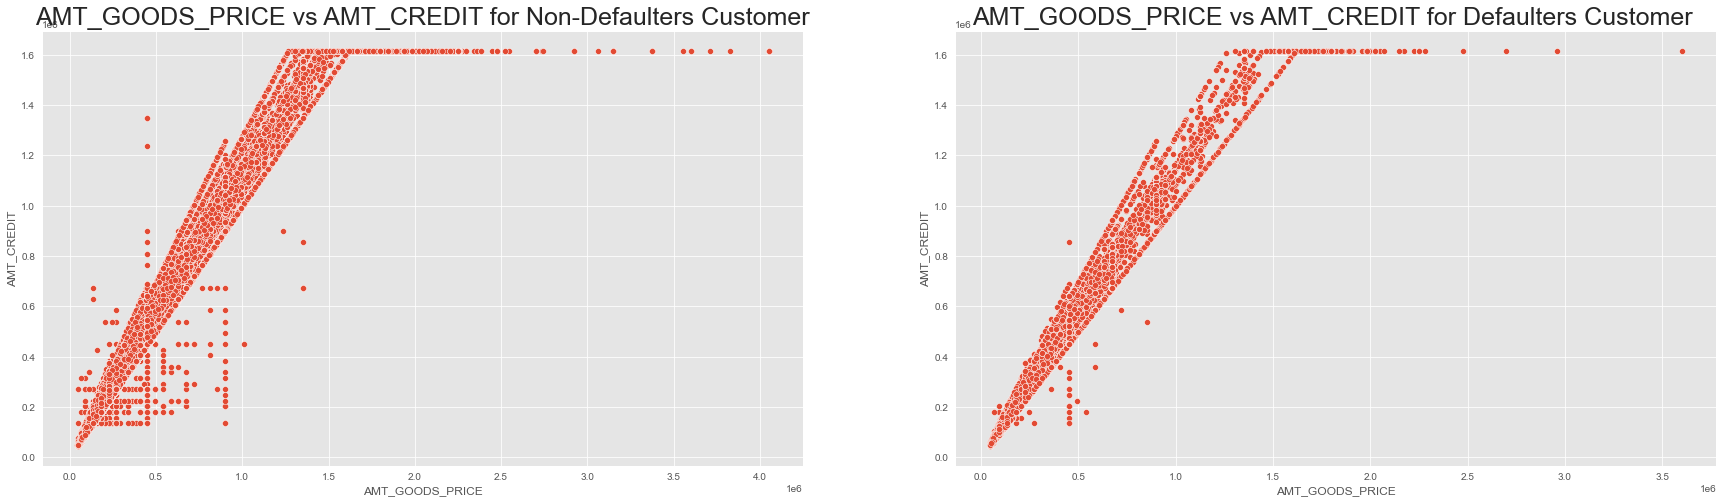

In [337]:
plot_for_Bi('AMT_GOODS_PRICE','AMT_CREDIT')

#### Conclusion -  AMT_CREDIT and AMT_GOODS_PRICE higher coorelation(0.97) interpretate that if goods price increses than loan price also increases in both Defaulter and Non-Defaulter cases

In [338]:
loan_Paid_0[["AMT_CREDIT","AMT_GOODS_PRICE"]].corr()

,AMT_CREDIT,AMT_GOODS_PRICE
AMT_CREDIT,1.000000,0.974915
AMT_GOODS_PRICE,0.974915,1.000000


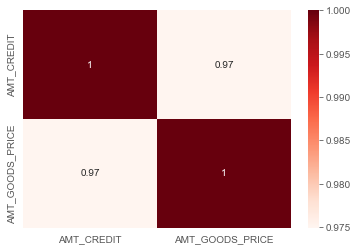

In [339]:
sns.heatmap(loan_Paid_0[["AMT_CREDIT","AMT_GOODS_PRICE"]].corr(), annot=True, cmap="Reds")
plt.show()

In [340]:
loan_Not_1[["AMT_CREDIT","AMT_GOODS_PRICE"]].corr()

,AMT_CREDIT,AMT_GOODS_PRICE
AMT_CREDIT,1.000000,0.974131
AMT_GOODS_PRICE,0.974131,1.000000


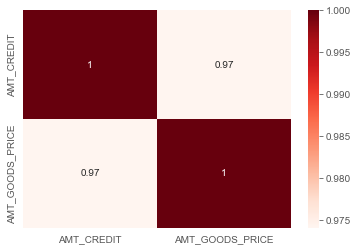

In [341]:
sns.heatmap(loan_Not_1[["AMT_CREDIT","AMT_GOODS_PRICE"]].corr(), annot=True, cmap="Reds")
plt.show()

##### 9.2 Correlation between AMT_ANNUITY and AMT_CREDIT

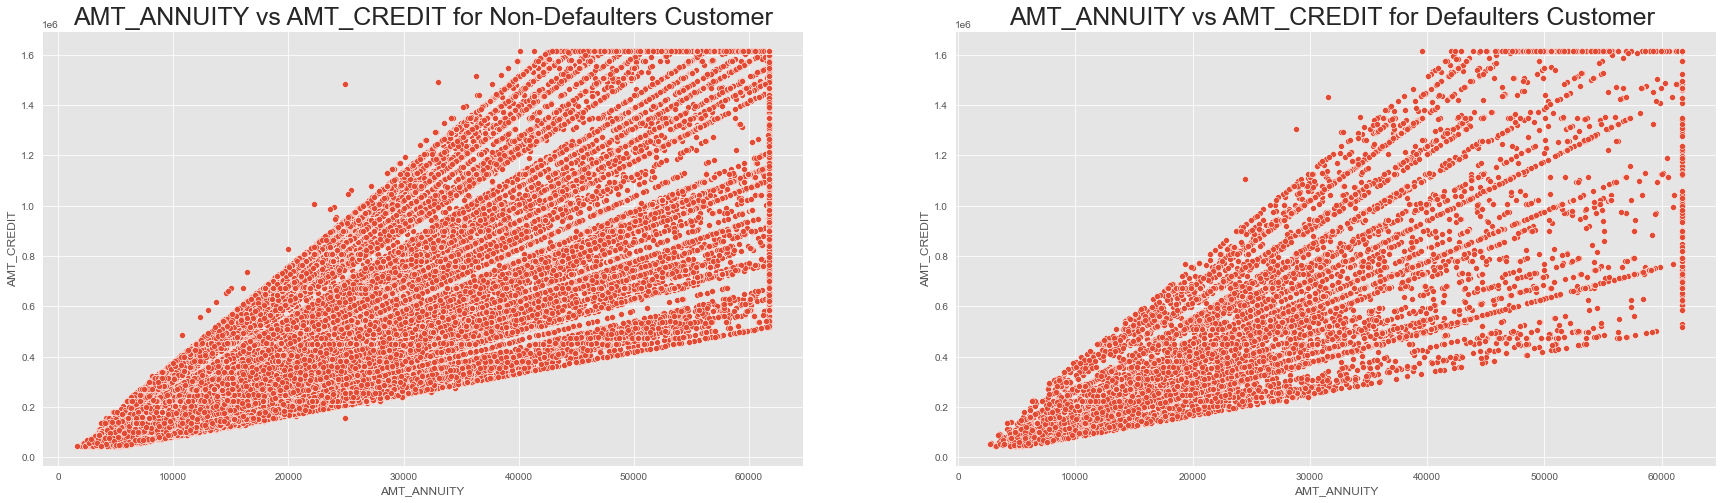

In [342]:
plot_for_Bi('AMT_ANNUITY','AMT_CREDIT')

#### AMT_CREDIT and AMT_ANNUITY higher coorelation(0.79) interpretate that if good price increses than Annuity also increases in both Defaulter(0.76) and Non-Defaulter(0.79) cases.

In [343]:
loan_Paid_0[["AMT_CREDIT","AMT_ANNUITY"]].corr()

,AMT_CREDIT,AMT_ANNUITY
AMT_CREDIT,1.000000,0.794807
AMT_ANNUITY,0.794807,1.000000


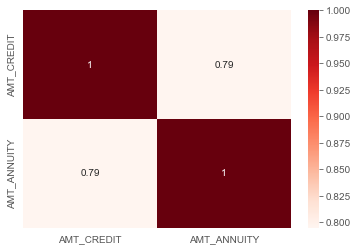

In [344]:
sns.heatmap(loan_Paid_0[["AMT_CREDIT","AMT_ANNUITY"]].corr(), annot=True, cmap="Reds")
plt.show()

In [345]:
loan_Not_1[["AMT_CREDIT","AMT_ANNUITY"]].corr()

,AMT_CREDIT,AMT_ANNUITY
AMT_CREDIT,1.000000,0.760123
AMT_ANNUITY,0.760123,1.000000


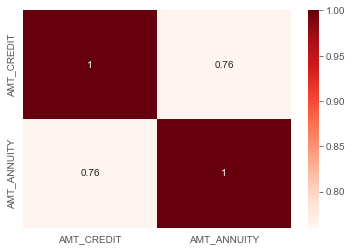

In [346]:
sns.heatmap(loan_Not_1[["AMT_CREDIT","AMT_ANNUITY"]].corr(), annot=True, cmap="Reds")
plt.show()

In [347]:
corr=loan_Paid_0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Variable_1','Variable_2','Correlation']
corr_df['Absolute_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Absolute_Correlation'], ascending=False)
corr_df.head(10)

,Variable_1,Variable_2,Correlation,Absolute_Correlation
1454,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998510,0.998510
334,AMT_GOODS_PRICE,AMT_CREDIT,0.974915,0.974915
1119,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950148,0.950148
724,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.886101,0.886101
992,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878569,0.878569
1510,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859328,0.859328
279,AMT_ANNUITY,AMT_CREDIT,0.794807,0.794807
335,AMT_GOODS_PRICE,AMT_ANNUITY,0.791381,0.791381
503,DAYS_EMPLOYED,DAYS_BIRTH,0.674781,0.674781
723,FLAG_EMP_PHONE,DAYS_BIRTH,-0.621992,0.621992


#### We can conclude that top 10 correlated are followings in Non-Defaulter:
1)OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE	(0.9985)

2)AMT_GOODS_PRICE and AMT_CREDIT	(0.974766)

3)REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT	(0.950148)

4)FLAG_EMP_PHONE and DAYS_EMPLOYED(-0.886)

5)CNT_FAM_MEMBERS and CNT_CHILDREN	(0.878569)	

6)DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE	0.859328

7)AMT_ANNUITY and AMT_CREDIT	(0.794807)

8)AMT_GOODS_PRICE and	AMT_ANNUITY	(0.791198)

9)DAYS_EMPLOYED	and DAYS_BIRTH	(0.674781)

10)FLAG_EMP_PHONE	DAYS_BIRTH	(-0.621992)


Note:-A postive strong correlation means the one variable will increase with other and a strong negative coorelation means the variable will decrrease with other. 


In [348]:

corr=loan_Not_1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Variable_1','Variable_2','Correlation']
corr_df['Absolute_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Absolute_Correlation'], ascending=False)
corr_df.head(10)

,Variable_1,Variable_2,Correlation,Absolute_Correlation
1454,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998270,0.998270
334,AMT_GOODS_PRICE,AMT_CREDIT,0.974131,0.974131
1119,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637,0.956637
724,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.901069,0.901069
992,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484,0.885484
1510,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.869016,0.869016
279,AMT_ANNUITY,AMT_CREDIT,0.760123,0.760123
335,AMT_GOODS_PRICE,AMT_ANNUITY,0.754842,0.754842
503,DAYS_EMPLOYED,DAYS_BIRTH,0.626857,0.626857
1828,FLAG_DOCUMENT_6,FLAG_EMP_PHONE,-0.617421,0.617421


#### We can conclude that top 10 variable correlated are followings in Defaulter Category:
1)OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE (0.9982)

2)AMT_GOODS_PRICE and AMT_CREDIT (0.9739)

3)REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT (0.9566)

4)FLAG_EMP_PHONE and DAYS_EMPLOYED(-0.9010)

5)CNT_FAM_MEMBERS and CNT_CHILDREN (0.88)

6)DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE (0.86)

7)AMT_ANNUITY and AMT_CREDIT (0.76)

8)AMT_GOODS_PRICE and AMT_ANNUITY (0.7545)

9)DAYS_EMPLOYED and DAYS_BIRTH (0.6268)

10)FLAG_Document_6 and Flag_Emp_phone (-0.6174)

Note:-A postive strong correlation means the one variable will increase with other and a strong negative coorelation means the variable will decrrease with other.

### 10.0 Numeric - Categorical

##### 10.1 Income range vs education for defaulter vs non-defaulter

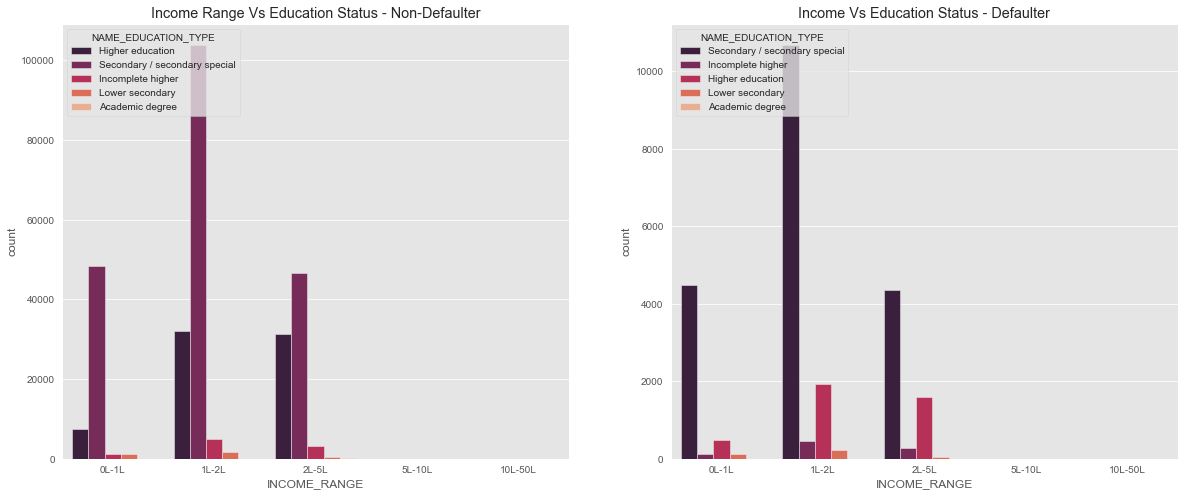

In [349]:
plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.title('Income Range Vs Education Status - Non-Defaulter')

sns.countplot(x='INCOME_RANGE', hue='NAME_EDUCATION_TYPE', data=loan_Paid_0, palette='rocket')

# subplot 2
plt.subplot(1, 2, 2)
plt.title('Income Vs Education Status - Defaulter')

sns.countplot(x='INCOME_RANGE', hue='NAME_EDUCATION_TYPE', data=loan_Not_1, palette='rocket')
plt.show()

#### Conclusion - People most likely to repay the loan have secondary/Secondary special education status and 1-2L income range

#### 10.2  credit amount vs martial status for defaulter vs non-defaulter

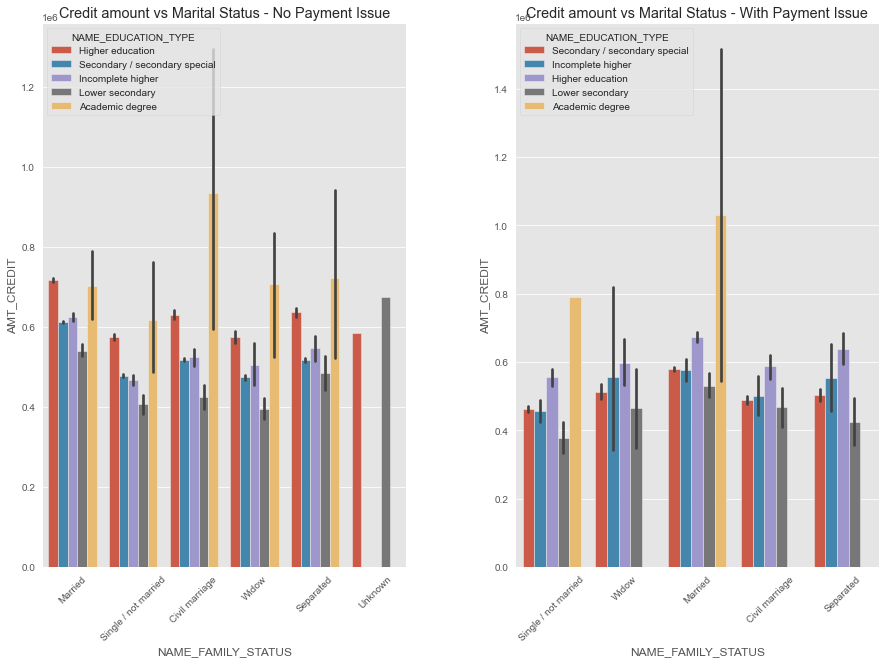

In [350]:

plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
sns.barplot(data =loan_Paid_0, x='NAME_FAMILY_STATUS',y='AMT_CREDIT', hue ='NAME_EDUCATION_TYPE',orient='v]')
plt.title('Credit amount vs Marital Status - No Payment Issue')
plt.xticks(rotation=45)

plt.subplot(122)
sns.barplot(data =loan_Not_1, x='NAME_FAMILY_STATUS',y='AMT_CREDIT', hue ='NAME_EDUCATION_TYPE',orient='v]',)
plt.title('Credit amount vs Marital Status - With Payment Issue')
plt.xticks(rotation=45)
plt.show()

##### Civil married guys with acadmic degree are more likly to get more  credit in acount as compare to widow with lower seconadry 

###  11 .Multivariate analysis

In [351]:
## Creating the pivot table for occupation vs Family status and target as value

In [352]:
M_variate = pd.pivot_table(data=Application_df, index='OCCUPATION_TYPE', columns='NAME_FAMILY_STATUS', values='TARGET')
M_variate

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
OCCUPATION_TYPE,,,,,,
Accountants,0.039370,0.046744,0.053352,0.058704,0.0,0.044521
Cleaning staff,0.102612,0.096250,0.078652,0.122066,NaN,0.067265
Cooking staff,0.120397,0.097944,0.084135,0.144550,NaN,0.059859
Core staff,0.077809,0.058067,0.057576,0.080491,NaN,0.038880
Drivers,0.146597,0.101009,0.145655,0.147986,NaN,0.153153
HR staff,0.136364,0.046832,0.065217,0.066667,NaN,0.200000
High skill tech staff,0.079108,0.057012,0.061252,0.072008,NaN,0.048327
IT staff,0.095238,0.069536,0.000000,0.060000,NaN,0.000000
Laborers,0.129185,0.096642,0.109462,0.132301,NaN,0.069250


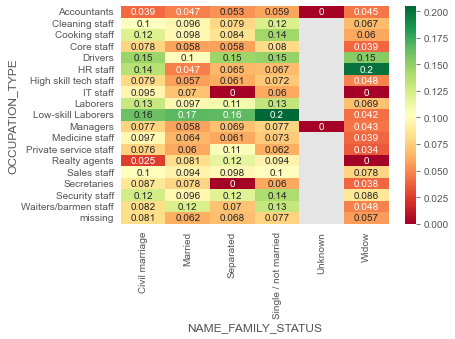

In [353]:
sns.heatmap(M_variate, annot=True, cmap="RdYlGn")  ####Multivariable analysis
plt.show()

##### The target variable 0 for non-defaulter and target variable 1 for defaulter so the value towards 0 more likly to re-pay the money and the value towards 1 is more likly to default.

Conclusions:
1)Low skill-laberours with single/not married most likly to default.

2)Secretatries and IT staff with seperated most likly to re-pay

3)IT Staff and widows and reality agents and widows also more likly to re-pay.

### 12 Working on Previous application data

#### 12.1 Previous applications data uplodaing

In [354]:
Previous_Application=pd.read_csv("previous_application.csv")

#### 12.2 Previous application data inspection

In [355]:
Previous_Application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [356]:
Previous_Application.shape

(1670214, 37)

In [357]:
print(Previous_Application.info(-1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### 12.3 Nulls percentage checking and their treatment i previous application

In [358]:
##Checking for nulls in previous applications
(Previous_Application.isnull().mean()*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [359]:
##Dropping the columns with NaN which have NaN>40%

Previous_Application = Previous_Application.loc[:,Previous_Application.isnull().mean()<=0.40]

In [360]:
(Previous_Application.isnull().mean()*100).sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

#### 12.4 Treating the missing values for prvious application data
AMT_GOODS_PRICE                
AMT_ANNUITY                   
CNT_PAYMENT                    

In [361]:
Previous_Application[['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT']].head()

,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
0,17145.0,1730.430,12.0
1,607500.0,25188.615,36.0
2,112500.0,15060.735,12.0
3,450000.0,47041.335,12.0
4,337500.0,31924.395,24.0


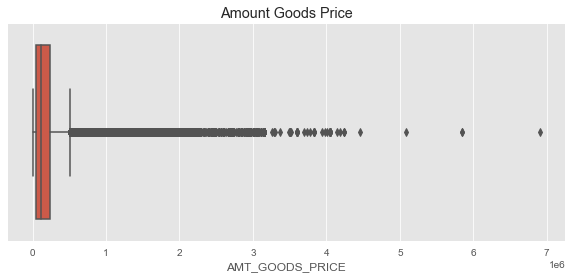

In [362]:
##Missing value treatment 
#Checking for outlier
plt.figure(figsize=(10,4))
sns.boxplot(Previous_Application.AMT_GOODS_PRICE)
plt.title('Amount Goods Price')
plt.show()

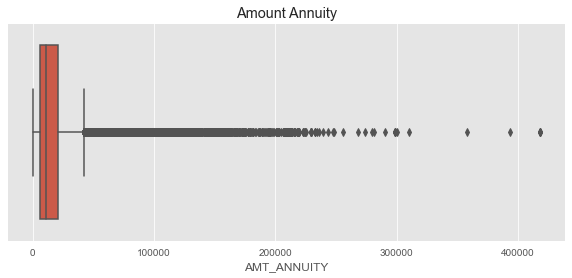

In [363]:
plt.figure(figsize=(10,4))
sns.boxplot(Previous_Application.AMT_ANNUITY)
plt.title('Amount Annuity')
plt.show()

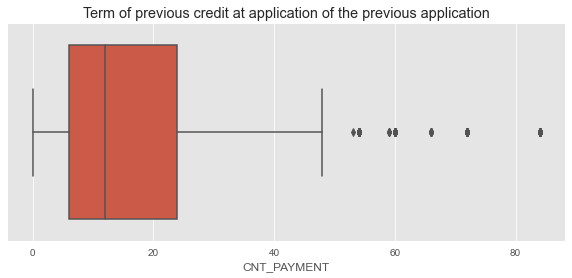

In [364]:
plt.figure(figsize=(10,4))
sns.boxplot(Previous_Application.CNT_PAYMENT)
plt.title('Term of previous credit at application of the previous application')
plt.show()

In [365]:
##Amount annuity and credit amount are continous data so we will fill with median as outlier are presents and CNT_PAYMENT we will replace NaN with Mode

In [366]:
#Imputing mdean for NaN in Amout Goods Price column
imp_val=Previous_Application["AMT_GOODS_PRICE"].median()
Previous_Application["AMT_GOODS_PRICE"]=Previous_Application["AMT_GOODS_PRICE"].fillna(imp_val)

In [367]:
#Imputing the median for NaNs in Amount Annuity column
imp_val=Previous_Application["AMT_ANNUITY"].median()
Previous_Application["AMT_ANNUITY"]=Previous_Application["AMT_ANNUITY"].fillna(imp_val)

In [368]:
#Imputing the median for NaNs in Amount Annuity column
imp_val=Previous_Application["CNT_PAYMENT"].mode()[0]
Previous_Application["CNT_PAYMENT"]=Previous_Application["CNT_PAYMENT"].fillna(imp_val)

In [369]:
(Previous_Application.isnull().mean()*100).sort_values(ascending=False)

PRODUCT_COMBINATION            0.020716
AMT_CREDIT                     0.000060
NAME_PAYMENT_TYPE              0.000000
NAME_YIELD_GROUP               0.000000
CNT_PAYMENT                    0.000000
NAME_SELLER_INDUSTRY           0.000000
SELLERPLACE_AREA               0.000000
CHANNEL_TYPE                   0.000000
NAME_PRODUCT_TYPE              0.000000
NAME_PORTFOLIO                 0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_CLIENT_TYPE               0.000000
CODE_REJECT_REASON             0.000000
SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_STATUS           0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
AMT_GOODS_PRICE                0.000000
AMT_APPLICATION                0.000000
AMT_ANNUITY                    0.000000
NAME_CONTRACT_TYPE             0.000000


In [370]:
##Dropping the missing values of PRODUCT_COMBINATION  
Previous_Application=Previous_Application[~(Previous_Application.PRODUCT_COMBINATION.isnull())]

In [371]:
(Previous_Application.isnull().mean()*100).sort_values(ascending=False)

AMT_CREDIT                     0.00006
SK_ID_PREV                     0.00000
NAME_PAYMENT_TYPE              0.00000
NAME_YIELD_GROUP               0.00000
CNT_PAYMENT                    0.00000
NAME_SELLER_INDUSTRY           0.00000
SELLERPLACE_AREA               0.00000
CHANNEL_TYPE                   0.00000
NAME_PRODUCT_TYPE              0.00000
NAME_PORTFOLIO                 0.00000
NAME_GOODS_CATEGORY            0.00000
NAME_CLIENT_TYPE               0.00000
CODE_REJECT_REASON             0.00000
DAYS_DECISION                  0.00000
SK_ID_CURR                     0.00000
NAME_CONTRACT_STATUS           0.00000
NAME_CASH_LOAN_PURPOSE         0.00000
NFLAG_LAST_APPL_IN_DAY         0.00000
FLAG_LAST_APPL_PER_CONTRACT    0.00000
HOUR_APPR_PROCESS_START        0.00000
WEEKDAY_APPR_PROCESS_START     0.00000
AMT_GOODS_PRICE                0.00000
AMT_APPLICATION                0.00000
AMT_ANNUITY                    0.00000
NAME_CONTRACT_TYPE             0.00000
PRODUCT_COMBINATION      

#### Now all nulls are treated 

### 12.5 Treatment of outliers for previous application data
Solution 1 --> Deleting the data with outliers (Not Good)

Solution 2 -->

(i) Capping : We will cap upper bound outliers equal to upper bound

(ii) Flooring :We will floor lower bound outliers equal to lower bound

##### 12.5.1 Amount good price column treatment

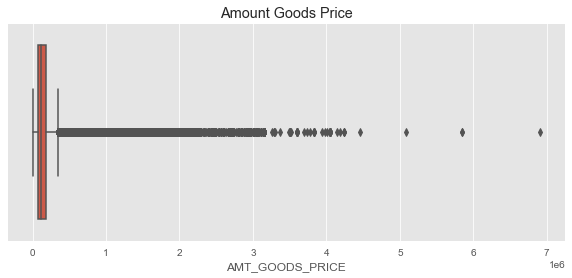

In [372]:
plt.figure(figsize=(10,4))
sns.boxplot(Previous_Application.AMT_GOODS_PRICE)
plt.title('Amount Goods Price')
plt.show()

In [373]:
##Capping this outlier of previous application amt_goods_price
q1=Previous_Application["AMT_GOODS_PRICE"].describe()["25%"]
q3=Previous_Application["AMT_GOODS_PRICE"].describe()["75%"]
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound,upper_bound
Previous_Application["AMT_GOODS_PRICE"]=np.where(Previous_Application["AMT_GOODS_PRICE"]>upper_bound,upper_bound,Previous_Application["AMT_GOODS_PRICE"])
Previous_Application["AMT_GOODS_PRICE"]=np.where(Previous_Application["AMT_GOODS_PRICE"]<lower_bound,lower_bound,Previous_Application["AMT_GOODS_PRICE"])

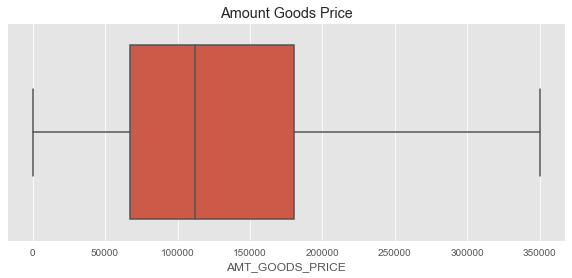

In [374]:
plt.figure(figsize=(10,4))
sns.boxplot(Previous_Application.AMT_GOODS_PRICE)
plt.title('Amount Goods Price')
plt.show()

##### 12.5.2 Amount anuuity treatment

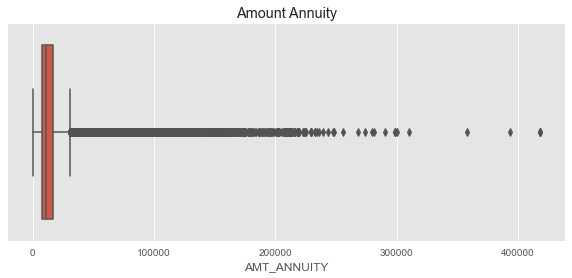

In [375]:
plt.figure(figsize=(10,4))
sns.boxplot(Previous_Application.AMT_ANNUITY)
plt.title('Amount Annuity')
plt.show()

In [376]:
##Capping this outlier of previous application amt_annuity
q1=Previous_Application["AMT_ANNUITY"].describe()["25%"]
q3=Previous_Application["AMT_ANNUITY"].describe()["75%"]
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound,upper_bound
Previous_Application["AMT_ANNUITY"]=np.where(Previous_Application["AMT_ANNUITY"]>upper_bound,upper_bound,Previous_Application["AMT_ANNUITY"])
Previous_Application["AMT_ANNUITY"]=np.where(Previous_Application["AMT_ANNUITY"]<lower_bound,lower_bound,Previous_Application["AMT_ANNUITY"])

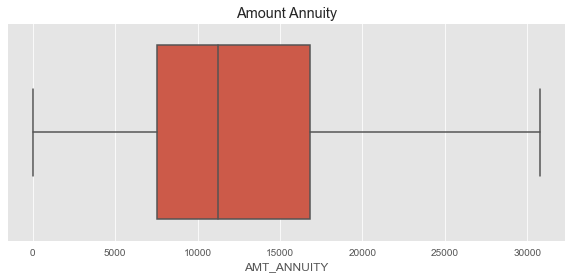

In [377]:
plt.figure(figsize=(10,4))
sns.boxplot(Previous_Application.AMT_ANNUITY)
plt.title('Amount Annuity')
plt.show()

##### 12.5.3 Outlier treatment for Amount credit of previous application

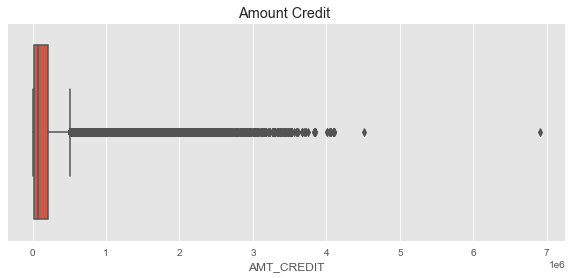

In [378]:
plt.figure(figsize=(10,4))
sns.boxplot(Previous_Application.AMT_CREDIT)
plt.title('Amount Credit ')
plt.show()

In [379]:
q1=Previous_Application["AMT_CREDIT"].describe()["25%"]
q3=Previous_Application["AMT_CREDIT"].describe()["75%"]
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound,upper_bound
Previous_Application["AMT_CREDIT"]=np.where(Previous_Application["AMT_CREDIT"]>upper_bound,upper_bound,Previous_Application["AMT_CREDIT"])
Previous_Application["AMT_CREDIT"]=np.where(Previous_Application["AMT_CREDIT"]<lower_bound,lower_bound,Previous_Application["AMT_CREDIT"])

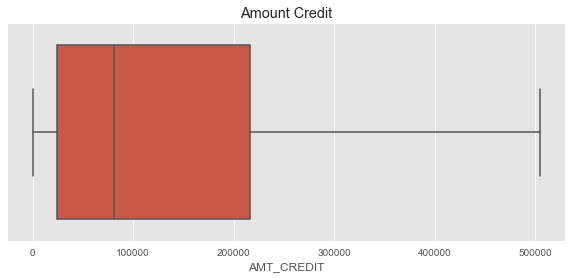

In [380]:
plt.figure(figsize=(10,4))
sns.boxplot(Previous_Application.AMT_CREDIT)
plt.title('Amount Credit')
plt.show()

#### 12.6 More sainty check in previous application data

In [381]:
Previous_Application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430000,17145.0,17145.00,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615000,607500.0,504758.25,349987.5,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735000,112500.0,136444.50,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,30752.634375,450000.0,470790.00,349987.5,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,30752.634375,337500.0,404055.00,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [382]:
Previous_Application["DAYS_DECISION"].value_counts()

-245     2444
-238     2390
-210     2375
-273     2349
-196     2315
         ... 
-2882     163
-2922     162
-2921     158
-2902     148
-1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

In [383]:
#Converting Days_decision column from negative to +ve
Previous_Application['DAYS_DECISION']=abs(Previous_Application['DAYS_DECISION'])

In [384]:
#Verifying the conversion
Previous_Application["DAYS_DECISION"].value_counts()

245     2444
238     2390
210     2375
273     2349
196     2315
        ... 
2882     163
2922     162
2921     158
2902     148
1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

In [385]:
#Checking the column loan purpose
Previous_Application["NAME_CASH_LOAN_PURPOSE"].value_counts()

XAP                                 922315
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [386]:
##We dont know about XNA and XAP so better to drop it
Previous_Application=Previous_Application.drop(Previous_Application[Previous_Application['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
Previous_Application=Previous_Application.drop(Previous_Application[Previous_Application['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [387]:
Previous_Application["NAME_CASH_LOAN_PURPOSE"].value_counts()

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

In [388]:
#Payment method column sanity check
Previous_Application["NAME_PAYMENT_TYPE"].value_counts()

Cash through the bank                        63835
XNA                                           5416
Non-cash from your account                     320
Cashless from the account of the employer       64
Name: NAME_PAYMENT_TYPE, dtype: int64

In [389]:
##We dont know about XNA so better to drop it
Previous_Application=Previous_Application.drop(Previous_Application[Previous_Application['NAME_PAYMENT_TYPE']=='XNA'].index)

In [390]:
Previous_Application["NAME_PAYMENT_TYPE"].value_counts()

Cash through the bank                        63835
Non-cash from your account                     320
Cashless from the account of the employer       64
Name: NAME_PAYMENT_TYPE, dtype: int64

In [391]:
Previous_Application["NAME_CONTRACT_STATUS"].value_counts()
#NAME_CONTRACT_STATUS

Refused         37778
Approved        24903
Canceled         1336
Unused offer      202
Name: NAME_CONTRACT_STATUS, dtype: int64

#### 13.0 Univariate Analysis for previous applications important columns

##### 13.1 Approvel rate of previous application

In [392]:
Previous_Application["NAME_CONTRACT_STATUS"].value_counts(normalize=True)*100

Refused         58.826827
Approved        38.778243
Canceled         2.080381
Unused offer     0.314549
Name: NAME_CONTRACT_STATUS, dtype: float64

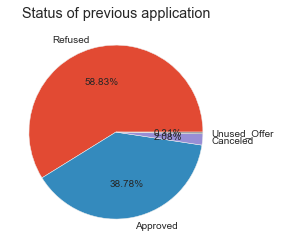

In [393]:
plt.pie(Previous_Application["NAME_CONTRACT_STATUS"].value_counts(normalize=True)*100,labels=['Refused','Approved',"Canceled","Unused_Offer"],autopct='%1.2f%%')
plt.title("Status of previous application")
plt.show()

#### 58.82 previous application were refused for bank loan in previous application

In [394]:
Previous_Application["NAME_CLIENT_TYPE"].value_counts(normalize=True)*100

Repeater     80.937106
New          14.241891
Refreshed     4.738473
XNA           0.082530
Name: NAME_CLIENT_TYPE, dtype: float64

In [395]:
##Dropping XNA from Client type column
Previous_Application=Previous_Application.drop(Previous_Application[Previous_Application['NAME_CLIENT_TYPE']=='XNA'].index)

##### 13.2 Client type of previous application

In [396]:
Previous_Application["NAME_CLIENT_TYPE"].value_counts(normalize=True)*100

Repeater     81.003958
New          14.253655
Refreshed     4.742387
Name: NAME_CLIENT_TYPE, dtype: float64

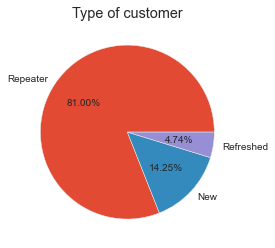

In [397]:
plt.pie(Previous_Application["NAME_CLIENT_TYPE"].value_counts(normalize=True)*100,labels=['Repeater',"New","Refreshed"],autopct='%1.2f%%')
plt.title("Type of customer")
plt.show()

#### 13.3 Type of payment method that client choose to do for previous application

In [398]:
Previous_Application["NAME_PAYMENT_TYPE"].value_counts(normalize=True)*100

Cash through the bank                        99.401552
Non-cash from your account                    0.498706
Cashless from the account of the employer     0.099741
Name: NAME_PAYMENT_TYPE, dtype: float64

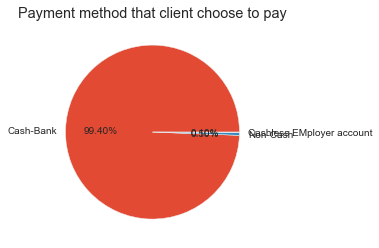

In [399]:
plt.pie(Previous_Application["NAME_PAYMENT_TYPE"].value_counts(normalize=True)*100,labels=['Cash-Bank',"Non-Cash","Cashless EMployer account"],autopct='%1.2f%%')
plt.title("Payment method that client choose to pay")
plt.show()

#### 14)Bi-variate Categorical vs Categorical analysis.

##### 14.1)Client Type vs NAME_CONTRACT_STATUS

NAME_CONTRACT_STATUS  Approved  Canceled  Refused  Unused offer
NAME_CLIENT_TYPE                                               
New                       7950       118     1069             9
Refreshed                 1571       114     1349             9
Repeater                 15376      1103    35314           184


<AxesSubplot:xlabel='NAME_CLIENT_TYPE'>

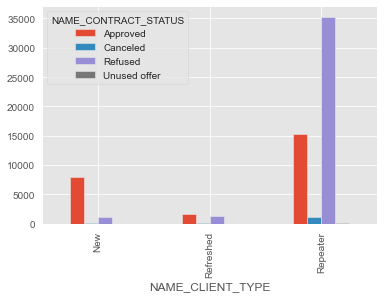

In [400]:
CrosstabResult=pd.crosstab(index=Previous_Application['NAME_CLIENT_TYPE'],columns=Previous_Application['NAME_CONTRACT_STATUS'])
print(CrosstabResult)
 
# Grouped bar chart between NAME_CLIENT_TYPE and NAME_CONTRACT_STATUS
%matplotlib inline                       
CrosstabResult.plot.bar()

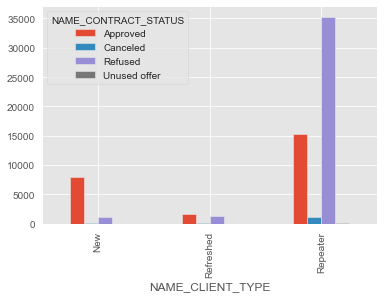

In [401]:
CrosstabResult.plot.bar()
plt.show()

Conclusion of previous data:

    1)Re-peater person most likly to get refused for loan as their percenteage for approvel is 61.75% vs percentage for
    Refused is 93.58%
    
    2)New person most likly to get approved for loan as their percentage for approvel is 31.93% vs percentage for refused
    is 2.83%

### 15) Merging the two data set

In [402]:
merge_data=pd.merge(Application_df,Previous_Application,how='left',on='SK_ID_CURR',suffixes=('_Current','_Previous'))

In [403]:
merge_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_Current,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY_Current,AMT_GOODS_PRICE_Current,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_Current,HOUR_APPR_PROCESS_START_Current,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,AGE_BINS,CREDIT_RANGE,GOODS_PRICE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_Previous,AMT_ANNUITY_Previous,AMT_APPLICATION,AMT_CREDIT_Previous,AMT_GOODS_PRICE_Previous,WEEKDAY_APPR_PROCESS_START_Previous,HOUR_APPR_PROCESS_START_Previous,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637.0,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2L-5L,19 to 25,3L-5L,3L-5L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188.0,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2L-5L,Middle Age_35 to 60,10L-20L,10L-20L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225.0,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0L-1L,Middle Age_35 to 60,1L-3L,1L-3L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039.0,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,Middle Age_35 to 60,3L-5L,1L-3L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secon

### Univariate Analysis

#### 16)Univariate analysis purpose of loan vs Target variable

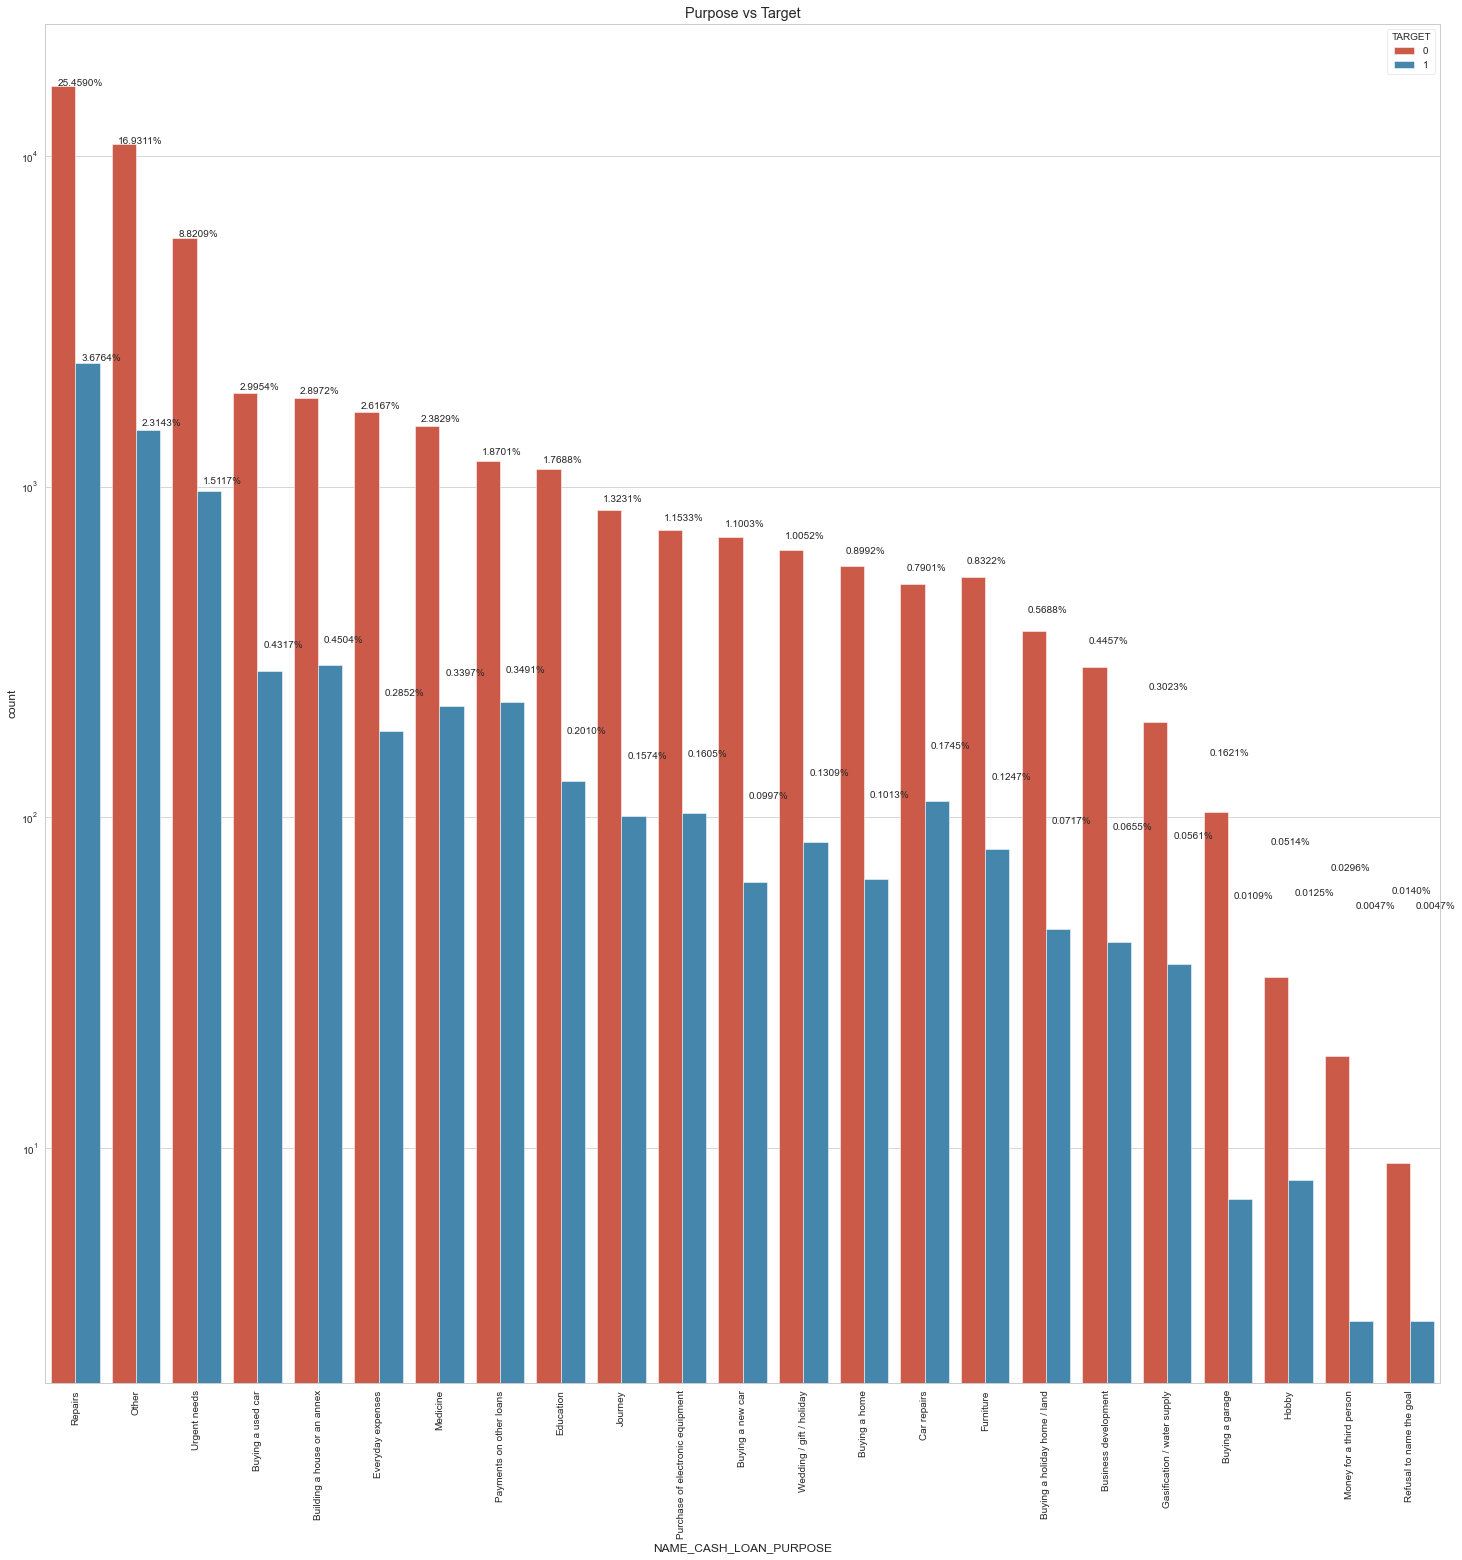

In [404]:
sns.set_style('whitegrid')

plt.figure(figsize=(25,25))
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Purpose vs Target')
ax = sns.countplot(data = merge_data, x= 'NAME_CASH_LOAN_PURPOSE', order=merge_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')
for y in ax.patches:
    ax.annotate('{:1.4f}%'.format((y.get_height()/len(Previous_Application))*100), (y.get_x()+0.1, y.get_height()+50))

#### Conclusion:-
Categories like 'Buying a garage', 'Buying a New car', etc are the categories who have more % in Re-pay vs default so they so there is no risk of giving loans to them

In [405]:
##Ploting the graph to compare their percentage of defaulter vs non-defaulter in each category itself for better clarity

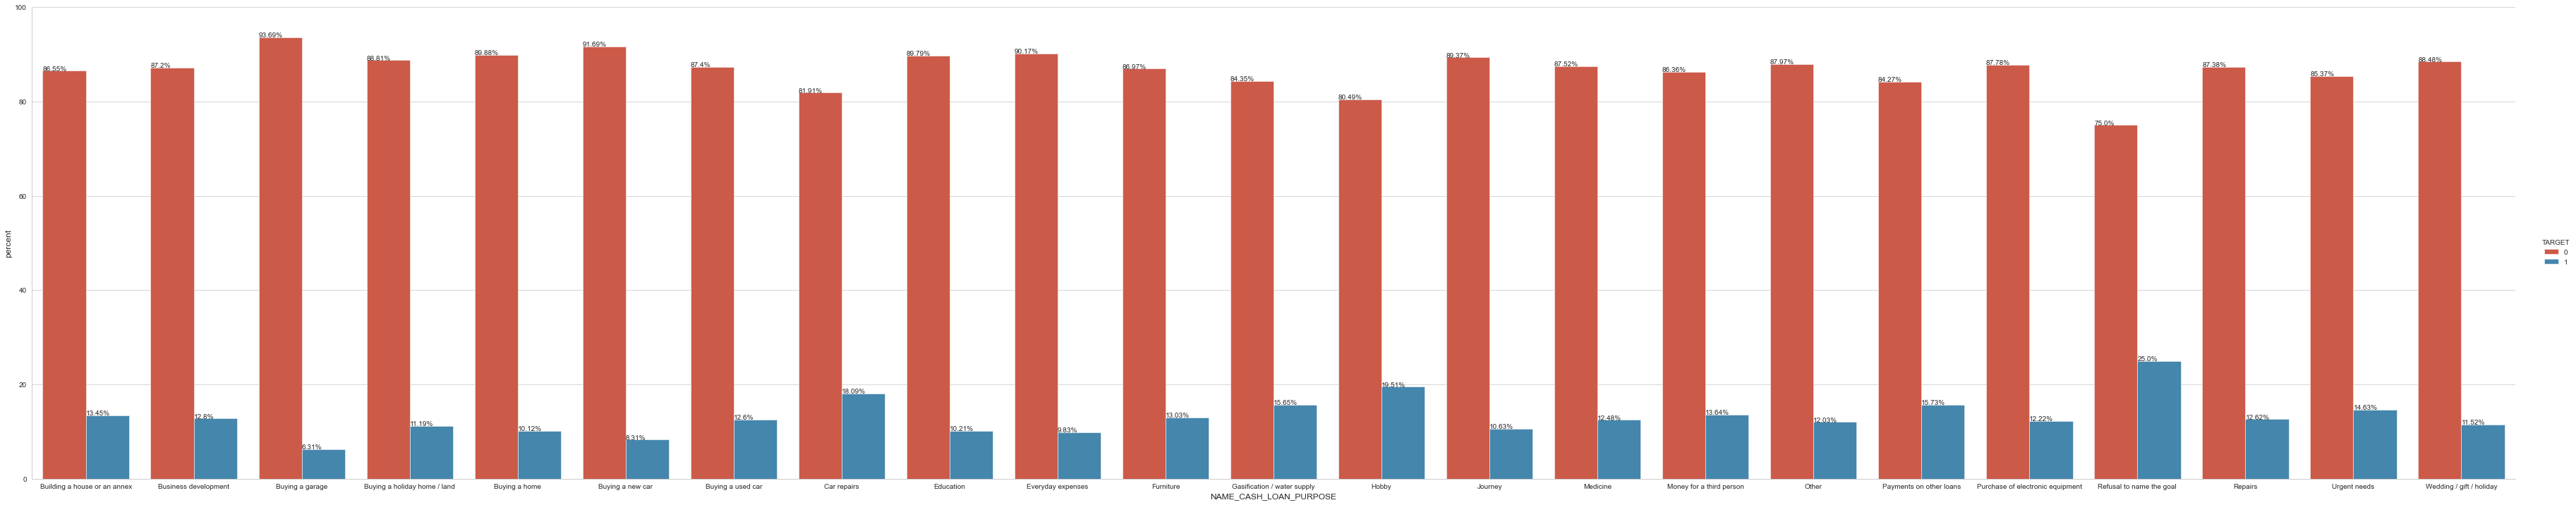

In [406]:

x,y ='NAME_CASH_LOAN_PURPOSE',"TARGET"

df1 = merge_data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y="percent",kind="bar",hue=y,data=df1, height=10, aspect=5,legend_out=True)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

#### Conclusion:-

#### Categories like 'Buying a garage', 'Buying a New car', least default rate as 6.31% and 8.31% respectively so giving losans to these category is safe

#### 17) Bivariate analysis after merging

###### 17.1 Eductaion vs Previous credit amount

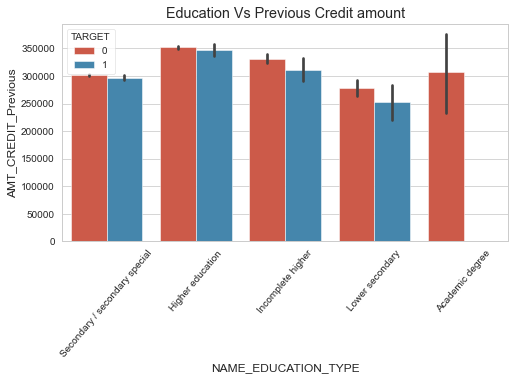

In [407]:
#Education vs Credit amount Previous
plt.figure(figsize=(8,4))
plt.xticks(rotation=50)
sns.barplot(data =merge_data, y='AMT_CREDIT_Previous',hue='TARGET',x='NAME_EDUCATION_TYPE',)
plt.title('Education Vs Previous Credit amount')
plt.show()

##### Acdamic degree people not defaulted at all to previously credited amount

##### 17.2 NAME_INCOME_TYPE vs Previous credit



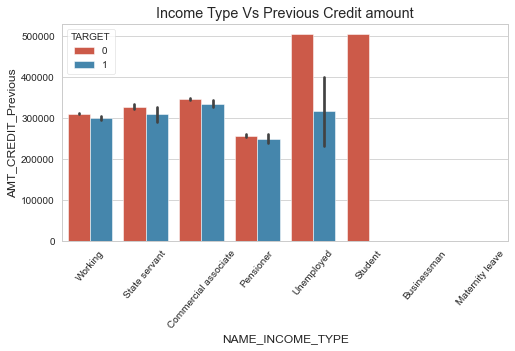

In [408]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=50)
sns.barplot(data =merge_data, y='AMT_CREDIT_Previous',hue='TARGET',x='NAME_INCOME_TYPE',)
plt.title('Income Type Vs Previous Credit amount')
plt.show()

#### Student not defaulted at all to previously credited amount and unemployed defaulted very least

##### 17.3 NAME_HOUSING_TYPE vs Previous credit

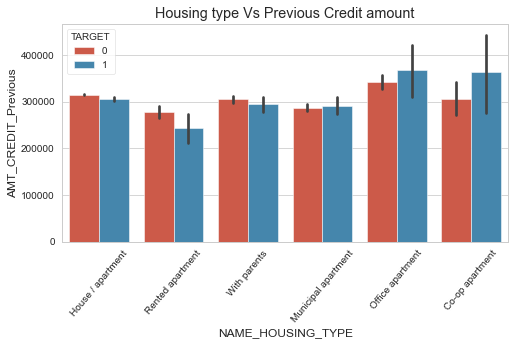

In [409]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=50)
sns.barplot(data =merge_data, y='AMT_CREDIT_Previous',hue='TARGET',x='NAME_HOUSING_TYPE',)
plt.title('Housing type Vs Previous Credit amount')
plt.show()

#### Office apartment and co-op apartmet defaulted most to previously credited amount so be caustious to giving them loan

#### 17.4 CODE_GENDER vs Previous credit amount

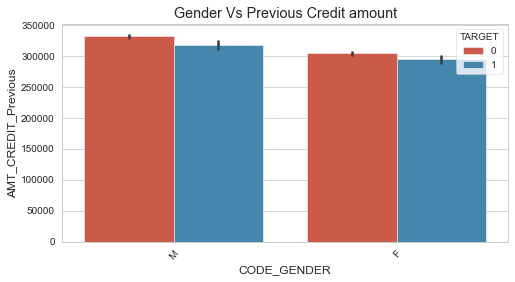

In [410]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=50)
sns.barplot(data =merge_data, y='AMT_CREDIT_Previous',hue='TARGET',x='CODE_GENDER',)
plt.title('Gender Vs Previous Credit amount')
plt.show()

#### Male applied more for loans there but female are less likly to default

##### 17.5 FLAG_OWN_CAR Vs Previous Credit


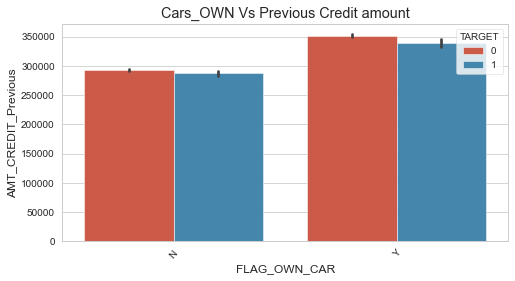

In [411]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=50)
sns.barplot(data =merge_data, y='AMT_CREDIT_Previous',hue='TARGET',x='FLAG_OWN_CAR',)
plt.title('Cars_OWN Vs Previous Credit amount')
plt.show()

#### People With cars applied for more loans and they are less likly to default previous credit amount

#### 18) Top 10 Correlation after merging of two data frame

In [412]:
corr = merge_data.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Variable_1', 'Variable_2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Variable_1,Variable_2,Correlation
1714,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
3893,AMT_GOODS_PRICE_Previous,AMT_CREDIT_Previous,0.98
394,AMT_GOODS_PRICE_Current,AMT_CREDIT_Current,0.97
1319,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
854,FLAG_EMP_PHONE,DAYS_EMPLOYED,0.89
1172,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
1780,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
3891,AMT_GOODS_PRICE_Previous,AMT_ANNUITY_Previous,0.79
395,AMT_GOODS_PRICE_Current,AMT_ANNUITY_Current,0.79
329,AMT_ANNUITY_Current,AMT_CREDIT_Current,0.79


##### Top 10 correlation after merging are as Followings:
OBS_60_CNT_SOCIAL_CIRCLE vs OBS_30_CNT_SOCIAL_CIRCLE	1.00

AMT_GOODS_PRICE_Previous vs AMT_CREDIT_Previous	        0.98

AMT_GOODS_PRICE_Current	vs  AMT_CREDIT_Current	        0.97

REGION_RATING_CLIENT_W_CITY	vs REGION_RATING_CLIENT	    0.95

FLAG_EMP_PHONE	vs DAYS_EMPLOYED	                    0.89

CNT_FAM_MEMBERS	CNT_CHILDREN	                        0.88

DEF_60_CNT_SOCIAL_CIRCLE	DEF_30_CNT_SOCIAL_CIRCLE	0.86

AMT_GOODS_PRICE_Previous	AMT_ANNUITY_Previous	    0.79

AMT_GOODS_PRICE_Current	AMT_ANNUITY_Current	            0.79

AMT_ANNUITY_Current	AMT_CREDIT_Current	                0.79
